DA6401 Assignment-1

NAME: MOUSINA BARMAN

ROLL: MA23M011



wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: ma23m011 (ma23m011-iit-madras) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


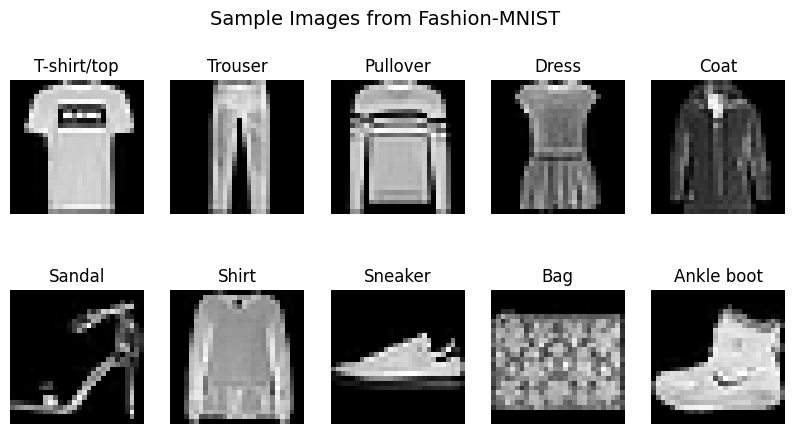

In [1]:
#For niumerical operation import numpy
import numpy as np
#For visualization import Matplotlib
import matplotlib.pyplot as plt
#For logging import Weights & Biases
import wandb
#import for fashion-mnist dataset from keras
from keras.datasets import fashion_mnist

# Initialize wandb for logging
wandb.init(project="DA6401_Assignment1_ma23m011", name="sample-images-1")

# Load fashion-mnist dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Class labels define based on fashion-mnist categories
class_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

#Initialize empty list to store sample  image and their labels
sample_images = []
sample_labels = []

#use for loop to add sample image and their class
for class_id in range(10):
    idx = np.where(y_train == class_id)[0][0]
    sample_images.append(x_train[idx])
    sample_labels.append(class_labels[class_id])

# With caption log images to wandb
wandb.log({"Sample Images": [wandb.Image(img, caption=label) for img, label in zip(sample_images, sample_labels)]})

# plot 2x5 grid image
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
fig.suptitle("Sample Images from Fashion-MNIST", fontsize=14)

#Display  image with labels
for i, ax in enumerate(axes.flat):
    ax.imshow(sample_images[i], cmap='gray')
    ax.set_title(sample_labels[i])
    ax.axis("off")

plt.show()

# Finish the wandb logging run
wandb.finish()


In [2]:
# # Normalize the input images (scale pixel values to [0,1])
# x_train = x_train.reshape(x_train.shape[0], -1) / 255.0  # Flatten 28x28 images to 784-dim vector
# x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

# # Convert labels to one-hot encoding
# def one_hot_encode(y, num_classes=10):
#     one_hot = np.zeros((y.size, num_classes))
#     one_hot[np.arange(y.size), y] = 1
#     return one_hot

# y_train = one_hot_encode(y_train)
# y_val = one_hot_encode(y_val)
# y_test = one_hot_encode(y_test)
# # Print to verify
# print("y_train shape:", y_train.shape)  # (54000, 10)
# print("y_val shape:", y_val.shape)      # (6000, 10)
# print("y_test shape:", y_test.shape)      # (10000, 10)

# # Define the Feedforward Neural Network class
# class NeuralNetwork:
#     def __init__(self, input_size=784, hidden_layers=[128, 64], output_size=10):
#         """
#         Initializes a fully connected neural network.
#         Parameters:
#             input_size (int): Number of input neurons (784 for Fashion-MNIST).
#             hidden_layers (list): List containing the number of neurons in each hidden layer.
#             output_size (int): Number of output neurons (10 for classification).
#         """
#         self.layers = [input_size] + hidden_layers + [output_size]  # Layers including input & output
#         self.weights = []
#         self.biases = []

#         # Initialize weights and biases
#         for i in range(len(self.layers) - 1):
#             self.weights.append(np.random.randn(self.layers[i], self.layers[i+1]) * 0.01)
#             self.biases.append(np.zeros((1, self.layers[i+1])))

#     def sigmoid(self, z):
#         z = np.clip(z, -500, 500)  # Prevent extreme values
#         return 1 / (1 + np.exp(-z))

#     def softmax(self, z):
#         exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Stability trick
#         return exp_z / np.sum(exp_z, axis=1, keepdims=True)

#     def forward(self, X):
#         """
#         Forward pass through the network.
#         Returns activations of all layers.
#         """
#         activations = [X]
#         for i in range(len(self.weights) - 1):
#             z = np.dot(activations[-1], self.weights[i]) + self.biases[i]
#             a = self.sigmoid(z)
#             activations.append(a)

#         # Output layer (softmax activation)
#         z_out = np.dot(activations[-1], self.weights[-1]) + self.biases[-1]
#         a_out = self.softmax(z_out)
#         activations.append(a_out)

#         return activations

#     def predict(self, X):
#         """
#         Predict class labels for given input.
#         """
#         output = self.forward(X)[-1]
#         return np.argmax(output, axis=1)


# # Create a neural network with a flexible architecture
# nn = NeuralNetwork(input_size=784, hidden_layers=[128, 64], output_size=10)

# # Forward pass example
# sample_input = x_train[:5]  # Take 5 sample images
# output_probs = nn.forward(sample_input)[-1]  # Get output probability distribution

# # Print predictions
# print("Predicted class probabilities:\n", output_probs)
# print("Predicted classes:", np.argmax(output_probs, axis=1))


In [3]:
import numpy as np
#import for fashion-mnist dataset from keras
from keras.datasets import fashion_mnist

# Load fashion-mnist dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize  0 to 1 pixel values and flatten images convert 1D vector
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

# From training dataset 60000 sample images create validation set
x_val = x_train[54000:]
y_val = y_train[54000:]

# For training using 54000 images
x_train = x_train[:54000]
y_train = y_train[:54000]

# Convert labels into one-hot encoding
def one_hot_encode(y, num_classes=10):
    one_hot = np.zeros((y.size, num_classes))
    one_hot[np.arange(y.size), y] = 1
    return one_hot

#training,test and validation labels apply one hot encoding
y_train = one_hot_encode(y_train)
y_val = one_hot_encode(y_val)
y_test = one_hot_encode(y_test)

#Define Neural Network Class
class NeuralNetwork:
    def __init__(self, input_size=784, hidden_layers=[128, 64], output_size=10,
                 learning_rate=0.01, optimizer="sgd", weight_init="random",
                 activation="sigmoid", weight_decay=0.0):
        #initialize parameters for feedforward neural network
        self.layers = [input_size] + hidden_layers + [output_size]
        self.learning_rate = learning_rate
        self.optimizer = optimizer
        self.weight_init = weight_init
        self.activation = activation
        self.weight_decay = weight_decay
        self.init_weights()

        #For different optimizer technique use optimizer-specific variables
        self.momentum = 0.9 #mumentum parameter
        self.beta1 = 0.9  # Adam/Nadam parameter
        self.beta2 = 0.999 # Adam/Nadam parameter
        self.epsilon = 1e-8
        self.velocity = [np.zeros_like(w) for w in self.weights] #mumentum velocity
        self.squared_grads = [np.zeros_like(w) for w in self.weights]
        self.m = [np.zeros_like(w) for w in self.weights] #adam 1st moment
        self.v = [np.zeros_like(w) for w in self.weights] #adam 2nd moment
        self.t = 0  # Time step

    def init_weights(self):
        # Initialize weights and biases
        self.weights = [] #Empty list define to store weight matrix
        self.biases = [] #Empty list define to store bias vector
        #loop use for random and xavier initialization
        for i in range(len(self.layers) - 1):
            if self.weight_init == "random":
                self.weights.append(np.random.randn(self.layers[i], self.layers[i+1]) * 0.01)
            elif self.weight_init == "xavier":
                self.weights.append(np.random.randn(self.layers[i], self.layers[i+1]) * np.sqrt(1 / self.layers[i]))
            self.biases.append(np.zeros((1, self.layers[i+1])))

    # Calculate activation function value based user expectation.
    def activation_function(self, z):
        if self.activation == "sigmoid":
            return 1 / (1 + np.exp(-np.clip(z, -10, 10)))
        elif self.activation == "tanh":
            return np.tanh(z)
        elif self.activation == "relu":
            return np.maximum(0, z)

    #calculate activation function derivative
    def activation_derivative(self, a):
        if self.activation == "sigmoid":
            return a * (1 - a)
        elif self.activation == "tanh":
            return 1 - a**2
        elif self.activation == "relu":
            return (a > 0).astype(float)

    #For output layer calculate softmax function value
    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    #Forward propagation
    def forward(self, X):
        #store each layer activation value
        activations = [X]
        #store weighted sum value
        z_values = []

         #Use for loop for calculate weighted sum and  apply activation function
        for i in range(len(self.weights) - 1):
            z = np.dot(activations[-1], self.weights[i]) + self.biases[i]
            z_values.append(z)
            activations.append(self.activation_function(z))

        #Final layer computation using softmax function
        z_out = np.dot(activations[-1], self.weights[-1]) + self.biases[-1]
        z_values.append(z_out)
        activations.append(self.softmax(z_out))

        return activations, z_values

    #Cross entropy loss computation with L2 ragularization
    def compute_loss(self, y_true, y_pred):
        #cross entropy loss
        loss = -np.sum(y_true * np.log(y_pred + self.epsilon)) / y_true.shape[0]
        #L2 regularization
        l2_penalty = self.weight_decay * sum(np.sum(w**2) for w in self.weights) / 2
        return loss + l2_penalty

    #Compute accuracy by comparing true vs predicted labels.
    def compute_accuracy(self, y_true, y_pred):
        correct_predictions = np.sum(np.argmax(y_pred, axis=1) == np.argmax(y_true, axis=1))
        return correct_predictions / y_true.shape[0]

     #Use backpropagation to calculate gradients.
    def backward(self, X, y_true, activations, z_values):
        gradients_w = [np.zeros_like(w) for w in self.weights]
        gradients_b = [np.zeros_like(b) for b in self.biases]

        #Compute output layer gradient
        dL_dz = activations[-1] - y_true
        gradients_w[-1] = np.dot(activations[-2].T, dL_dz) + self.weight_decay * self.weights[-1]
        gradients_b[-1] = np.sum(dL_dz, axis=0, keepdims=True)

        # Compute Hidden layers gradient
        for i in reversed(range(len(self.weights) - 1)):
            dL_dz = np.dot(dL_dz, self.weights[i+1].T) * self.activation_derivative(activations[i+1])
            gradients_w[i] = np.dot(activations[i].T, dL_dz) + self.weight_decay * self.weights[i]
            gradients_b[i] = np.sum(dL_dz, axis=0, keepdims=True)

        return gradients_w, gradients_b

    # Apply gradient updates using different optimizers.
    def update_weights(self, gradients_w, gradients_b):
        self.t += 1  # Update time step for Adam/Nadam

        for i in range(len(self.weights)):
            # Apply stochastic gradient descent
            if self.optimizer == "sgd":
                self.weights[i] -= self.learning_rate * gradients_w[i]
                self.biases[i] -= self.learning_rate * gradients_b[i]

            #Apply momentum gradient descent
            elif self.optimizer == "momentum":
                self.velocity[i] = self.momentum * self.velocity[i] - self.learning_rate * gradients_w[i]
                self.weights[i] += self.velocity[i]
                self.biases[i] -= self.learning_rate * gradients_b[i]

            #Apply nestrov
            elif self.optimizer == "nesterov":
                temp_weights = self.weights[i] + self.momentum * self.velocity[i]
                self.velocity[i] = self.momentum * self.velocity[i] - self.learning_rate * gradients_w[i]
                self.weights[i] = temp_weights + self.velocity[i]

            #Apply rmsprop optimizer
            elif self.optimizer == "rmsprop":
                self.squared_grads[i] = 0.9 * self.squared_grads[i] + 0.1 * (gradients_w[i] ** 2)
                self.weights[i] -= self.learning_rate * gradients_w[i] / (np.sqrt(self.squared_grads[i]) + self.epsilon)

            #Apply adam optimizer
            elif self.optimizer == "adam":
                self.m[i] = self.beta1 * self.m[i] + (1 - self.beta1) * gradients_w[i]
                self.v[i] = self.beta2 * self.v[i] + (1 - self.beta2) * (gradients_w[i] ** 2)
                m_hat = self.m[i] / (1 - self.beta1 ** self.t)
                v_hat = self.v[i] / (1 - self.beta2 ** self.t)
                self.weights[i] -= self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)

            #Apply nadam optimizer
            elif self.optimizer == "nadam":
                m_hat = (self.beta1 * self.m[i] + (1 - self.beta1) * gradients_w[i]) / (1 - self.beta1 ** self.t)
                v_hat = self.v[i] / (1 - self.beta2 ** self.t)
                self.weights[i] -= self.learning_rate * (self.momentum * m_hat + (1 - self.momentum) * gradients_w[i]) / (np.sqrt(v_hat) + self.epsilon)

    def train(self, X_train, y_train, X_val, y_val, epochs=10, batch_size=32):
        #Train nural network using mini-batch gradient descent.
        num_samples = X_train.shape[0]

        #use for loop for shuffle training data
        for epoch in range(epochs):
            indices = np.arange(num_samples)
            np.random.shuffle(indices)
            X_train, y_train = X_train[indices], y_train[indices]

            # Mini-batch training
            for i in range(0, num_samples, batch_size):
                X_batch = X_train[i:i + batch_size]
                y_batch = y_train[i:i + batch_size]

                #Use forward pass
                activations, z_values = self.forward(X_batch)

                # Compute gradients of weight and bias using backpropagation
                gradients_w, gradients_b = self.backward(X_batch, y_batch, activations, z_values)

                # Update weights and bias
                self.update_weights(gradients_w, gradients_b)

            # Compute training loss & accuracy
            train_activations, _ = self.forward(X_train)
            Train_loss = self.compute_loss(y_train, train_activations[-1])
            Train_accuracy = compute_accuracy(y_train, train_activations[-1])

            # Compute validation loss & accuracy
            val_activations, _ = self.forward(X_val)
            Val_loss = self.compute_loss(y_val, val_activations[-1])
            Val_accuracy = compute_accuracy(y_val, val_activations[-1])
            wandb.log({'Train_loss': Train_loss})
            wandb.log({'Train_accuracy': Train_accuracy })
            wandb.log({'epoch': epoch + 1})
            wandb.log({'Val_loss': Val_loss})
            wandb.log({'Val_accuracy': Val_accuracy })

            print(f"Epoch {epoch+1}: Train Loss = {Train_loss:.4f}, Train Acc = {Train_accuracy:.4f}, Val Loss = {Val_loss:.4f}, Val Acc = {Val_accuracy:.4f}")

def compute_accuracy(y_true, y_pred):
        #Compute accuracy by comparing true vs predicted labels.
        correct_predictions = np.sum(np.argmax(y_pred, axis=1) == np.argmax(y_true, axis=1))
        accuracy = correct_predictions / y_true.shape[0]
        return accuracy*100

In [4]:
# # Flatten both training and validation sets
# x_train = x_train.reshape(x_train.shape[0], -1)  # (54000, 784)
# x_val = x_val.reshape(x_val.shape[0], -1)  # (6000, 784)

# # Create Neural Network
# nn = NeuralNetwork(input_size=784, hidden_layers=[128, 64], output_size=10, learning_rate=0.01, optimizer="sgd", weight_init="xavier", activation="relu", weight_decay=0.0005)

# # Train the model and track accuracy
# nn.train(x_train, y_train, x_val, y_val, epochs=10, batch_size=32)


In [5]:
!pip install wandb

In [6]:
import wandb
import numpy as np
#For easy attribute access import SimpleNamespace
from types import SimpleNamespace
# import Random  for randomization
import random

In [7]:
key = input('Enter your API:')
wandb.login(key=key)

Enter your API:580e769ee2f34eafdded556ce52aaf31c265ad3b


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [12]:
# Define the sweep configuration
sweep_config = {
    'method': 'bayes',# Use Bayesian optimization
    'name' : 'sweep cross entropy-11', #sweep name
    'metric': {
      'name': 'Val_accuracy',
      'goal': 'maximize' # maximize validation accuracy
    },
    'parameters': {
        'epochs': {
            'values': [5,10] #number of training epoch
        },
        'hidden_layers':{
            'values':[3,4,5] #number of hidden layer
        },
         'hidden_size':{
            'values':[32,64,128] #hidden layer size
        },
        'weight_decay':{
            'values':[0, 0.0005, 0.5] # Regularization
        },
        'learning_rate': {
            'values': [1e-3, 1e-4] # Learning rate
        },
        'optimizer': {
            'values': ['rmsprop', 'nadam','adam', 'nag','mgd','sgd'] # Optimizers
        },
        'batch_size':{
            'values':[16,32,64] # Batch sizes for training
        },
        'weight_init': {
            'values': ['xavier','random'] # Weight initialization
        },
        'activation': {
            'values': ['relu','tanh','sigmoid'] # Activation function
        },
    }
}

sweep_id = wandb.sweep(sweep=sweep_config, project='DA6401_Assignment1_ma23m011')

Create sweep with ID: 9fpdii9h
Sweep URL: https://wandb.ai/ma23m011-iit-madras/DA6401_Assignment1_ma23m011/sweeps/9fpdii9h


In [13]:
def main():
    with wandb.init() as run:
      # Generate a unique run name based on the hyperparameters
        run_name="-ac_"+wandb.config.activation+"-hs_"+str(wandb.config.hidden_size)+"-epc_"+str(wandb.config.epochs)+"-hl_"+str(wandb.config.hidden_layers)+"-regu_"+str(wandb.config.weight_decay)+"-eta_"+str(wandb.config.learning_rate)+"-optmz_"+wandb.config.optimizer+"-batch_"+str(wandb.config.batch_size)+"-wght_"+wandb.config.weight_init
        wandb.run.name=run_name
        # Create a Neural Network with the selected hyperparameters
        nn = NeuralNetwork(input_size=784, hidden_layers=[wandb.config.hidden_size] * wandb.config.hidden_layers, output_size=10, learning_rate=wandb.config.learning_rate, optimizer=wandb.config.optimizer, weight_init=wandb.config.weight_init, activation=wandb.config.activation, weight_decay=wandb.config.weight_decay)
        nn.train(x_train, y_train, x_val, y_val, epochs=wandb.config.epochs, batch_size=wandb.config.batch_size)


# # Create Neural Network
# nn = NeuralNetwork(input_size=784, hidden_layers=[128, 64], output_size=10, learning_rate=0.01, optimizer="sgd")

# # Train the model and track accuracy
# nn.train(x_train, y_train, x_val, y_val, epochs=10, batch_size=32)

wandb.agent(sweep_id, function=main,count=100) # calls main function for count number of times.
# Finish the W&B run
wandb.finish()

wandb: Agent Starting Run: ge37mwlv with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: mgd
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1: Train Loss = 3.0127, Train Acc = 14.3241, Val Loss = 3.0127, Val Acc = 13.7500
Epoch 2: Train Loss = 3.0127, Train Acc = 14.3241, Val Loss = 3.0127, Val Acc = 13.7500
Epoch 3: Train Loss = 3.0127, Train Acc = 14.3241, Val Loss = 3.0127, Val Acc = 13.7500
Epoch 4: Train Loss = 3.0127, Train Acc = 14.3241, Val Loss = 3.0127, Val Acc = 13.7500
Epoch 5: Train Loss = 3.0127, Train Acc = 14.3241, Val Loss = 3.0127, Val Acc = 13.7500
Epoch 6: Train Loss = 3.0127, Train Acc = 14.3241, Val Loss = 3.0127, Val Acc = 13.7500
Epoch 7: Train Loss = 3.0127, Train Acc = 14.3241, Val Loss = 3.0127, Val Acc = 13.7500
Epoch 8: Train Loss = 3.0127, Train Acc = 14.3241, Val Loss = 3.0127, Val Acc = 13.7500
Epoch 9: Train Loss = 3.0127, Train Acc = 14.3241, Val Loss = 3.0127, Val Acc = 13.7500
Epoch 10: Train Loss = 3.0127, Train Acc = 14.3241, Val Loss = 3.0127, Val Acc = 13.7500


Train_accuracy,▁▁▁▁▁▁▁▁▁▁
Train_loss,▁▁▁▁▁▁▁▁▁▁
Val_accuracy,▁▁▁▁▁▁▁▁▁▁
Val_loss,▁▁▁▁▁▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,14.32407
Train_loss,3.01271
Val_accuracy,13.75
Val_loss,3.01271
epoch,10


wandb: Agent Starting Run: 76d1rbha with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 0.4307, Train Acc = 84.4296, Val Loss = 0.4445, Val Acc = 83.1500
Epoch 2: Train Loss = 0.3794, Train Acc = 86.4111, Val Loss = 0.3963, Val Acc = 85.8833
Epoch 3: Train Loss = 0.3481, Train Acc = 87.7000, Val Loss = 0.3786, Val Acc = 86.6333
Epoch 4: Train Loss = 0.3564, Train Acc = 87.1611, Val Loss = 0.3891, Val Acc = 86.0667
Epoch 5: Train Loss = 0.3262, Train Acc = 88.1907, Val Loss = 0.3699, Val Acc = 86.8833
Epoch 6: Train Loss = 0.3222, Train Acc = 88.3722, Val Loss = 0.3709, Val Acc = 86.7833
Epoch 7: Train Loss = 0.3285, Train Acc = 87.9889, Val Loss = 0.3844, Val Acc = 86.4333
Epoch 8: Train Loss = 0.3088, Train Acc = 88.7796, Val Loss = 0.3641, Val Acc = 87.1500
Epoch 9: Train Loss = 0.2999, Train Acc = 88.8759, Val Loss = 0.3662, Val Acc = 87.0500
Epoch 10: Train Loss = 0.2823, Train Acc = 89.8130, Val Loss = 0.3541, Val Acc = 87.7500


Train_accuracy,▁▄▅▅▆▆▆▇▇█
Train_loss,█▆▄▄▃▃▃▂▂▁
Val_accuracy,▁▅▆▅▇▇▆▇▇█
Val_loss,█▄▃▄▂▂▃▂▂▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,89.81296
Train_loss,0.28232
Val_accuracy,87.75
Val_loss,0.35409
epoch,10


wandb: Agent Starting Run: ixacr358 with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1: Train Loss = 6.0549, Train Acc = 4.2796, Val Loss = 6.0549, Val Acc = 4.2500
Epoch 2: Train Loss = 6.0549, Train Acc = 4.2796, Val Loss = 6.0549, Val Acc = 4.2500
Epoch 3: Train Loss = 6.0549, Train Acc = 4.2796, Val Loss = 6.0549, Val Acc = 4.2500
Epoch 4: Train Loss = 6.0549, Train Acc = 4.2796, Val Loss = 6.0549, Val Acc = 4.2500
Epoch 5: Train Loss = 6.0549, Train Acc = 4.2796, Val Loss = 6.0549, Val Acc = 4.2500


Train_accuracy,▁▁▁▁▁
Train_loss,▁▁▁▁▁
Val_accuracy,▁▁▁▁▁
Val_loss,▁▁▁▁▁
epoch,▁▃▅▆█
Train_accuracy,4.27963
Train_loss,6.05488
Val_accuracy,4.25
Val_loss,6.05488
epoch,5


wandb: Agent Starting Run: gjy1luea with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1: Train Loss = 6.4719, Train Acc = 9.9648, Val Loss = 6.5061, Val Acc = 10.3167
Epoch 2: Train Loss = 5.8503, Train Acc = 9.9648, Val Loss = 5.8860, Val Acc = 10.3167
Epoch 3: Train Loss = 5.4754, Train Acc = 9.9648, Val Loss = 5.5142, Val Acc = 10.3167
Epoch 4: Train Loss = 5.2151, Train Acc = 10.0833, Val Loss = 5.2564, Val Acc = 9.2500
Epoch 5: Train Loss = 5.0477, Train Acc = 10.0833, Val Loss = 5.0896, Val Acc = 9.2500
Epoch 6: Train Loss = 4.9350, Train Acc = 10.0833, Val Loss = 4.9760, Val Acc = 9.2500
Epoch 7: Train Loss = 4.8437, Train Acc = 10.0833, Val Loss = 4.8829, Val Acc = 9.2500
Epoch 8: Train Loss = 4.7582, Train Acc = 10.0833, Val Loss = 4.7952, Val Acc = 9.2500
Epoch 9: Train Loss = 4.6836, Train Acc = 10.0833, Val Loss = 4.7199, Val Acc = 9.2500
Epoch 10: Train Loss = 4.5784, Train Acc = 10.0833, Val Loss = 4.6173, Val Acc = 9.2500


Train_accuracy,▁▁▁███████
Train_loss,█▆▄▃▃▂▂▂▁▁
Val_accuracy,███▁▁▁▁▁▁▁
Val_loss,█▆▄▃▃▂▂▂▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,10.08333
Train_loss,4.57836
Val_accuracy,9.25
Val_loss,4.6173
epoch,10


wandb: Agent Starting Run: 9lzna4s9 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 1.7794, Train Acc = 22.2111, Val Loss = 1.7819, Val Acc = 22.4333
Epoch 2: Train Loss = 1.5408, Train Acc = 28.3000, Val Loss = 1.5418, Val Acc = 28.4833
Epoch 3: Train Loss = 1.4704, Train Acc = 29.2944, Val Loss = 1.4723, Val Acc = 28.7500
Epoch 4: Train Loss = 1.4509, Train Acc = 31.0667, Val Loss = 1.4535, Val Acc = 31.9833
Epoch 5: Train Loss = 1.4362, Train Acc = 33.3870, Val Loss = 1.4385, Val Acc = 33.5667


Train_accuracy,▁▅▅▇█
Train_loss,█▃▂▁▁
Val_accuracy,▁▅▅▇█
Val_loss,█▃▂▁▁
epoch,▁▃▅▆█
Train_accuracy,33.38704
Train_loss,1.43623
Val_accuracy,33.56667
Val_loss,1.43854
epoch,5


wandb: Agent Starting Run: j22o73ag with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.6829, Train Acc = 20.0389, Val Loss = 1.6841, Val Acc = 19.8167
Epoch 2: Train Loss = 1.3550, Train Acc = 40.2278, Val Loss = 1.3507, Val Acc = 41.1000
Epoch 3: Train Loss = 1.1260, Train Acc = 57.3167, Val Loss = 1.1228, Val Acc = 58.8000
Epoch 4: Train Loss = 0.9334, Train Acc = 65.4685, Val Loss = 0.9315, Val Acc = 66.2333
Epoch 5: Train Loss = 0.8607, Train Acc = 69.1519, Val Loss = 0.8638, Val Acc = 69.5500
Epoch 6: Train Loss = 0.8067, Train Acc = 73.3130, Val Loss = 0.8089, Val Acc = 73.8667
Epoch 7: Train Loss = 0.7298, Train Acc = 77.0167, Val Loss = 0.7359, Val Acc = 77.5167
Epoch 8: Train Loss = 0.6844, Train Acc = 78.0630, Val Loss = 0.6927, Val Acc = 78.4500
Epoch 9: Train Loss = 0.6354, Train Acc = 79.5333, Val Loss = 0.6504, Val Acc = 79.3167
Epoch 10: Train Loss = 0.6140, Train Acc = 80.3130, Val Loss = 0.6332, Val Acc = 79.8333


Train_accuracy,▁▃▅▆▇▇████
Train_loss,█▆▄▃▃▂▂▁▁▁
Val_accuracy,▁▃▆▆▇▇████
Val_loss,█▆▄▃▃▂▂▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,80.31296
Train_loss,0.61397
Val_accuracy,79.83333
Val_loss,0.63324
epoch,10


wandb: Agent Starting Run: lt9v9jqt with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: mgd
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1: Train Loss = 2.3051, Train Acc = 9.9444, Val Loss = 2.3040, Val Acc = 10.5000
Epoch 2: Train Loss = 2.3051, Train Acc = 9.9444, Val Loss = 2.3040, Val Acc = 10.5000
Epoch 3: Train Loss = 2.3051, Train Acc = 9.9444, Val Loss = 2.3040, Val Acc = 10.5000
Epoch 4: Train Loss = 2.3051, Train Acc = 9.9444, Val Loss = 2.3040, Val Acc = 10.5000
Epoch 5: Train Loss = 2.3051, Train Acc = 9.9444, Val Loss = 2.3040, Val Acc = 10.5000


Train_accuracy,▁▁▁▁▁
Train_loss,▁▁▁▁▁
Val_accuracy,▁▁▁▁▁
Val_loss,▁▁▁▁▁
epoch,▁▃▅▆█
Train_accuracy,9.94444
Train_loss,2.30515
Val_accuracy,10.5
Val_loss,2.30402
epoch,5


wandb: Agent Starting Run: pfhljziu with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1: Train Loss = 14.2298, Train Acc = 9.9648, Val Loss = 14.1928, Val Acc = 10.3167
Epoch 2: Train Loss = 13.0939, Train Acc = 9.9648, Val Loss = 13.1091, Val Acc = 10.3167
Epoch 3: Train Loss = 10.7234, Train Acc = 9.9907, Val Loss = 10.7879, Val Acc = 10.0833
Epoch 4: Train Loss = 8.9187, Train Acc = 9.9648, Val Loss = 9.0004, Val Acc = 10.3167
Epoch 5: Train Loss = 7.3331, Train Acc = 10.0648, Val Loss = 7.4287, Val Acc = 9.4167


Train_accuracy,▁▁▃▁█
Train_loss,█▇▄▃▁
Val_accuracy,██▆█▁
Val_loss,█▇▄▃▁
epoch,▁▃▅▆█
Train_accuracy,10.06481
Train_loss,7.33314
Val_accuracy,9.41667
Val_loss,7.42869
epoch,5


wandb: Agent Starting Run: 1o5x6qdb with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 1.0584, Train Acc = 61.1407, Val Loss = 1.0396, Val Acc = 62.0833
Epoch 2: Train Loss = 0.8063, Train Acc = 73.3574, Val Loss = 0.7945, Val Acc = 73.8167
Epoch 3: Train Loss = 0.6883, Train Acc = 79.3481, Val Loss = 0.6852, Val Acc = 79.4333
Epoch 4: Train Loss = 0.6263, Train Acc = 81.0889, Val Loss = 0.6289, Val Acc = 80.9833
Epoch 5: Train Loss = 0.5948, Train Acc = 82.2907, Val Loss = 0.5963, Val Acc = 82.0667


Train_accuracy,▁▅▇██
Train_loss,█▄▂▁▁
Val_accuracy,▁▅▇██
Val_loss,█▄▂▂▁
epoch,▁▃▅▆█
Train_accuracy,82.29074
Train_loss,0.5948
Val_accuracy,82.06667
Val_loss,0.59627
epoch,5


wandb: Agent Starting Run: tget9hnm with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1: Train Loss = 2.3026, Train Acc = 13.0741, Val Loss = 2.3027, Val Acc = 11.8833
Epoch 2: Train Loss = 2.3026, Train Acc = 10.0648, Val Loss = 2.3027, Val Acc = 9.4167
Epoch 3: Train Loss = 2.3025, Train Acc = 10.0833, Val Loss = 2.3027, Val Acc = 9.2500
Epoch 4: Train Loss = 2.3025, Train Acc = 10.0833, Val Loss = 2.3027, Val Acc = 9.2500
Epoch 5: Train Loss = 2.3025, Train Acc = 10.0833, Val Loss = 2.3027, Val Acc = 9.2500


Train_accuracy,█▁▁▁▁
Train_loss,█▆▅▃▁
Val_accuracy,█▁▁▁▁
Val_loss,▁▅█▆▆
epoch,▁▃▅▆█
Train_accuracy,10.08333
Train_loss,2.30251
Val_accuracy,9.25
Val_loss,2.30271
epoch,5


wandb: Agent Starting Run: z94r520v with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.0235, Train Acc = 54.5648, Val Loss = 1.0232, Val Acc = 54.3167
Epoch 2: Train Loss = 0.9484, Train Acc = 60.4889, Val Loss = 0.9423, Val Acc = 60.8000
Epoch 3: Train Loss = 0.9068, Train Acc = 63.8278, Val Loss = 0.9048, Val Acc = 64.2667
Epoch 4: Train Loss = 0.8993, Train Acc = 63.4574, Val Loss = 0.8957, Val Acc = 63.6167
Epoch 5: Train Loss = 0.8568, Train Acc = 66.9519, Val Loss = 0.8562, Val Acc = 67.0333
Epoch 6: Train Loss = 0.7980, Train Acc = 69.7630, Val Loss = 0.7982, Val Acc = 69.9333
Epoch 7: Train Loss = 0.7514, Train Acc = 72.2056, Val Loss = 0.7488, Val Acc = 72.7000
Epoch 8: Train Loss = 0.7286, Train Acc = 72.6093, Val Loss = 0.7265, Val Acc = 73.1167
Epoch 9: Train Loss = 0.6789, Train Acc = 74.7630, Val Loss = 0.6812, Val Acc = 75.4167
Epoch 10: Train Loss = 0.6296, Train Acc = 78.2759, Val Loss = 0.6325, Val Acc = 78.4167


Train_accuracy,▁▃▄▄▅▅▆▆▇█
Train_loss,█▇▆▆▅▄▃▃▂▁
Val_accuracy,▁▃▄▄▅▆▆▆▇█
Val_loss,█▇▆▆▅▄▃▃▂▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,78.27593
Train_loss,0.62965
Val_accuracy,78.41667
Val_loss,0.63249
epoch,10


wandb: Agent Starting Run: hdia7xtx with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1: Train Loss = 2.3027, Train Acc = 9.9444, Val Loss = 2.3027, Val Acc = 10.5000
Epoch 2: Train Loss = 2.3027, Train Acc = 9.9444, Val Loss = 2.3027, Val Acc = 10.5000
Epoch 3: Train Loss = 2.3027, Train Acc = 9.9444, Val Loss = 2.3027, Val Acc = 10.5000
Epoch 4: Train Loss = 2.3027, Train Acc = 9.9444, Val Loss = 2.3027, Val Acc = 10.5000
Epoch 5: Train Loss = 2.3027, Train Acc = 9.9444, Val Loss = 2.3027, Val Acc = 10.5000
Epoch 6: Train Loss = 2.3027, Train Acc = 9.9444, Val Loss = 2.3027, Val Acc = 10.5000
Epoch 7: Train Loss = 2.3027, Train Acc = 9.9444, Val Loss = 2.3027, Val Acc = 10.5000
Epoch 8: Train Loss = 2.3027, Train Acc = 9.9444, Val Loss = 2.3027, Val Acc = 10.5000
Epoch 9: Train Loss = 2.3027, Train Acc = 9.9444, Val Loss = 2.3027, Val Acc = 10.5000
Epoch 10: Train Loss = 2.3027, Train Acc = 9.9444, Val Loss = 2.3027, Val Acc = 10.5000


Train_accuracy,▁▁▁▁▁▁▁▁▁▁
Train_loss,▁▁▁▁▁▁▁▁▁▁
Val_accuracy,▁▁▁▁▁▁▁▁▁▁
Val_loss,▁▁▁▁▁▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,9.94444
Train_loss,2.30269
Val_accuracy,10.5
Val_loss,2.30269
epoch,10


wandb: Agent Starting Run: crep3gn2 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1: Train Loss = 2.4328, Train Acc = 9.9389, Val Loss = 2.4326, Val Acc = 10.5500
Epoch 2: Train Loss = 2.3267, Train Acc = 9.9704, Val Loss = 2.3272, Val Acc = 10.2667
Epoch 3: Train Loss = 2.3071, Train Acc = 10.0833, Val Loss = 2.3074, Val Acc = 9.2500
Epoch 4: Train Loss = 2.3035, Train Acc = 10.0833, Val Loss = 2.3041, Val Acc = 9.2500
Epoch 5: Train Loss = 2.3028, Train Acc = 9.9907, Val Loss = 2.3032, Val Acc = 10.0833


Train_accuracy,▁▃██▄
Train_loss,█▂▁▁▁
Val_accuracy,█▆▁▁▅
Val_loss,█▂▁▁▁
epoch,▁▃▅▆█
Train_accuracy,9.99074
Train_loss,2.30281
Val_accuracy,10.08333
Val_loss,2.30318
epoch,5


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: kypvffk3 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: mgd
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 2.3033, Train Acc = 6.5093, Val Loss = 2.3033, Val Acc = 6.7833
Epoch 2: Train Loss = 2.3033, Train Acc = 6.5093, Val Loss = 2.3033, Val Acc = 6.7833
Epoch 3: Train Loss = 2.3033, Train Acc = 6.5093, Val Loss = 2.3033, Val Acc = 6.7833
Epoch 4: Train Loss = 2.3033, Train Acc = 6.5093, Val Loss = 2.3033, Val Acc = 6.7833
Epoch 5: Train Loss = 2.3033, Train Acc = 6.5093, Val Loss = 2.3033, Val Acc = 6.7833
Epoch 6: Train Loss = 2.3033, Train Acc = 6.5093, Val Loss = 2.3033, Val Acc = 6.7833
Epoch 7: Train Loss = 2.3033, Train Acc = 6.5093, Val Loss = 2.3033, Val Acc = 6.7833
Epoch 8: Train Loss = 2.3033, Train Acc = 6.5093, Val Loss = 2.3033, Val Acc = 6.7833
Epoch 9: Train Loss = 2.3033, Train Acc = 6.5093, Val Loss = 2.3033, Val Acc = 6.7833
Epoch 10: Train Loss = 2.3033, Train Acc = 6.5093, Val Loss = 2.3033, Val Acc = 6.7833


Train_accuracy,▁▁▁▁▁▁▁▁▁▁
Train_loss,▁▁▁▁▁▁▁▁▁▁
Val_accuracy,▁▁▁▁▁▁▁▁▁▁
Val_loss,▁▁▁▁▁▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,6.50926
Train_loss,2.30327
Val_accuracy,6.78333
Val_loss,2.30327
epoch,10


wandb: Agent Starting Run: l9l793pe with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1: Train Loss = nan, Train Acc = 9.9444, Val Loss = nan, Val Acc = 10.5000
Epoch 2: Train Loss = nan, Train Acc = 9.9444, Val Loss = nan, Val Acc = 10.5000
Epoch 3: Train Loss = nan, Train Acc = 9.9444, Val Loss = nan, Val Acc = 10.5000
Epoch 4: Train Loss = nan, Train Acc = 9.9444, Val Loss = nan, Val Acc = 10.5000
Epoch 5: Train Loss = nan, Train Acc = 9.9444, Val Loss = nan, Val Acc = 10.5000
Epoch 6: Train Loss = nan, Train Acc = 9.9444, Val Loss = nan, Val Acc = 10.5000
Epoch 7: Train Loss = nan, Train Acc = 9.9444, Val Loss = nan, Val Acc = 10.5000
Epoch 8: Train Loss = nan, Train Acc = 9.9444, Val Loss = nan, Val Acc = 10.5000
Epoch 9: Train Loss = nan, Train Acc = 9.9444, Val Loss = nan, Val Acc = 10.5000
Epoch 10: Train Loss = nan, Train Acc = 9.9444, Val Loss = nan, Val Acc = 10.5000


Train_accuracy,▁▁▁▁▁▁▁▁▁▁
Val_accuracy,▁▁▁▁▁▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,9.94444
Train_loss,nan
Val_accuracy,10.5
Val_loss,nan
epoch,10


wandb: Agent Starting Run: 8fjily5k with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: mgd
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 2.4021, Train Acc = 7.2519, Val Loss = 2.4063, Val Acc = 7.1833
Epoch 2: Train Loss = 2.4021, Train Acc = 7.2519, Val Loss = 2.4063, Val Acc = 7.1833
Epoch 3: Train Loss = 2.4021, Train Acc = 7.2519, Val Loss = 2.4063, Val Acc = 7.1833
Epoch 4: Train Loss = 2.4021, Train Acc = 7.2519, Val Loss = 2.4063, Val Acc = 7.1833
Epoch 5: Train Loss = 2.4021, Train Acc = 7.2519, Val Loss = 2.4063, Val Acc = 7.1833
Epoch 6: Train Loss = 2.4021, Train Acc = 7.2519, Val Loss = 2.4063, Val Acc = 7.1833
Epoch 7: Train Loss = 2.4021, Train Acc = 7.2519, Val Loss = 2.4063, Val Acc = 7.1833
Epoch 8: Train Loss = 2.4021, Train Acc = 7.2519, Val Loss = 2.4063, Val Acc = 7.1833
Epoch 9: Train Loss = 2.4021, Train Acc = 7.2519, Val Loss = 2.4063, Val Acc = 7.1833
Epoch 10: Train Loss = 2.4021, Train Acc = 7.2519, Val Loss = 2.4063, Val Acc = 7.1833


Train_accuracy,▁▁▁▁▁▁▁▁▁▁
Train_loss,▁▁▁▁▁▁▁▁▁▁
Val_accuracy,▁▁▁▁▁▁▁▁▁▁
Val_loss,▁▁▁▁▁▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,7.25185
Train_loss,2.40206
Val_accuracy,7.18333
Val_loss,2.40632
epoch,10


wandb: Agent Starting Run: 80jirugp with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 0.6161, Train Acc = 80.5722, Val Loss = 0.6114, Val Acc = 80.5667
Epoch 2: Train Loss = 0.4765, Train Acc = 84.0463, Val Loss = 0.4837, Val Acc = 83.4667
Epoch 3: Train Loss = 0.4265, Train Acc = 85.3111, Val Loss = 0.4376, Val Acc = 84.6000
Epoch 4: Train Loss = 0.3994, Train Acc = 86.1889, Val Loss = 0.4158, Val Acc = 85.0667
Epoch 5: Train Loss = 0.3831, Train Acc = 86.6259, Val Loss = 0.3974, Val Acc = 85.7667
Epoch 6: Train Loss = 0.3747, Train Acc = 86.7500, Val Loss = 0.3919, Val Acc = 85.7167
Epoch 7: Train Loss = 0.3627, Train Acc = 87.0852, Val Loss = 0.3831, Val Acc = 86.3500
Epoch 8: Train Loss = 0.3516, Train Acc = 87.6537, Val Loss = 0.3743, Val Acc = 86.5333
Epoch 9: Train Loss = 0.3498, Train Acc = 87.6185, Val Loss = 0.3727, Val Acc = 86.7667
Epoch 10: Train Loss = 0.3390, Train Acc = 87.9981, Val Loss = 0.3673, Val Acc = 86.9000


Train_accuracy,▁▄▅▆▇▇▇███
Train_loss,█▄▃▃▂▂▂▁▁▁
Val_accuracy,▁▄▅▆▇▇▇███
Val_loss,█▄▃▂▂▂▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,87.99815
Train_loss,0.33897
Val_accuracy,86.9
Val_loss,0.36726
epoch,10


wandb: Agent Starting Run: 88uogdl6 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.5630, Train Acc = 31.8981, Val Loss = 1.5662, Val Acc = 31.0167
Epoch 2: Train Loss = 1.1114, Train Acc = 54.3296, Val Loss = 1.1129, Val Acc = 55.0667
Epoch 3: Train Loss = 0.9083, Train Acc = 68.0370, Val Loss = 0.9039, Val Acc = 68.6667
Epoch 4: Train Loss = 0.8949, Train Acc = 66.8796, Val Loss = 0.9063, Val Acc = 66.9333
Epoch 5: Train Loss = 0.7871, Train Acc = 74.6778, Val Loss = 0.7870, Val Acc = 74.7500
Epoch 6: Train Loss = 0.6713, Train Acc = 78.8148, Val Loss = 0.6759, Val Acc = 78.5333
Epoch 7: Train Loss = 0.6291, Train Acc = 80.4037, Val Loss = 0.6427, Val Acc = 79.9167
Epoch 8: Train Loss = 0.5935, Train Acc = 81.7315, Val Loss = 0.6122, Val Acc = 80.8833
Epoch 9: Train Loss = 0.5406, Train Acc = 83.5944, Val Loss = 0.5574, Val Acc = 82.9167
Epoch 10: Train Loss = 0.5157, Train Acc = 84.6704, Val Loss = 0.5408, Val Acc = 83.6167


Train_accuracy,▁▄▆▆▇▇▇███
Train_loss,█▅▄▄▃▂▂▂▁▁
Val_accuracy,▁▄▆▆▇▇████
Val_loss,█▅▃▃▃▂▂▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,84.67037
Train_loss,0.51566
Val_accuracy,83.61667
Val_loss,0.54083
epoch,10


wandb: Agent Starting Run: mlr2vo5m with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 2.3129, Train Acc = 9.9963, Val Loss = 2.3100, Val Acc = 10.0333
Epoch 2: Train Loss = 2.3123, Train Acc = 10.0648, Val Loss = 2.3130, Val Acc = 9.4167
Epoch 3: Train Loss = 2.3091, Train Acc = 10.0648, Val Loss = 2.3083, Val Acc = 9.4167
Epoch 4: Train Loss = 2.3160, Train Acc = 10.0648, Val Loss = 2.3163, Val Acc = 9.4167
Epoch 5: Train Loss = 2.3086, Train Acc = 9.9444, Val Loss = 2.3080, Val Acc = 10.5000
Epoch 6: Train Loss = 2.3101, Train Acc = 10.0167, Val Loss = 2.3099, Val Acc = 9.8500
Epoch 7: Train Loss = 2.3103, Train Acc = 10.0833, Val Loss = 2.3107, Val Acc = 9.2500
Epoch 8: Train Loss = 2.3105, Train Acc = 9.9648, Val Loss = 2.3115, Val Acc = 10.3167
Epoch 9: Train Loss = 2.3108, Train Acc = 9.9444, Val Loss = 2.3082, Val Acc = 10.5000
Epoch 10: Train Loss = 2.3118, Train Acc = 10.0648, Val Loss = 2.3143, Val Acc = 9.4167


Train_accuracy,▄▇▇▇▁▅█▂▁▇
Train_loss,▅▅▁█▁▂▃▃▃▄
Val_accuracy,▅▂▂▂█▄▁▇█▂
Val_loss,▃▅▁█▁▃▃▄▁▆
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,10.06481
Train_loss,2.31178
Val_accuracy,9.41667
Val_loss,2.31425
epoch,10


wandb: Agent Starting Run: vt1umfrn with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 0.4920, Train Acc = 84.7444, Val Loss = 0.5046, Val Acc = 83.9500
Epoch 2: Train Loss = 0.4694, Train Acc = 85.1963, Val Loss = 0.4773, Val Acc = 84.8500
Epoch 3: Train Loss = 0.4337, Train Acc = 86.9685, Val Loss = 0.4540, Val Acc = 85.9833
Epoch 4: Train Loss = 0.4235, Train Acc = 87.2574, Val Loss = 0.4406, Val Acc = 86.5500
Epoch 5: Train Loss = 0.3982, Train Acc = 88.1037, Val Loss = 0.4270, Val Acc = 87.2667
Epoch 6: Train Loss = 0.4144, Train Acc = 87.8093, Val Loss = 0.4510, Val Acc = 86.3833
Epoch 7: Train Loss = 0.3921, Train Acc = 88.6556, Val Loss = 0.4336, Val Acc = 87.1833
Epoch 8: Train Loss = 0.4046, Train Acc = 88.3519, Val Loss = 0.4471, Val Acc = 87.0167
Epoch 9: Train Loss = 0.3832, Train Acc = 89.0704, Val Loss = 0.4207, Val Acc = 87.9000
Epoch 10: Train Loss = 0.3908, Train Acc = 88.8278, Val Loss = 0.4450, Val Acc = 87.5833


Train_accuracy,▁▂▅▅▆▆▇▇██
Train_loss,█▇▄▄▂▃▂▂▁▁
Val_accuracy,▁▃▅▆▇▅▇▆█▇
Val_loss,█▆▄▃▂▄▂▃▁▃
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,88.82778
Train_loss,0.39077
Val_accuracy,87.58333
Val_loss,0.44497
epoch,10


wandb: Agent Starting Run: o37wuzjw with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1: Train Loss = 0.5015, Train Acc = 80.7574, Val Loss = 0.5129, Val Acc = 80.5000
Epoch 2: Train Loss = 0.4113, Train Acc = 86.1167, Val Loss = 0.4533, Val Acc = 84.9167
Epoch 3: Train Loss = 0.5227, Train Acc = 82.3889, Val Loss = 0.5612, Val Acc = 82.1000
Epoch 4: Train Loss = 0.4298, Train Acc = 86.3111, Val Loss = 0.4866, Val Acc = 84.9500
Epoch 5: Train Loss = 0.4879, Train Acc = 84.2593, Val Loss = 0.5375, Val Acc = 83.6833


Train_accuracy,▁█▃█▅
Train_loss,▇▁█▂▆
Val_accuracy,▁█▄█▆
Val_loss,▅▁█▃▆
epoch,▁▃▅▆█
Train_accuracy,84.25926
Train_loss,0.48793
Val_accuracy,83.68333
Val_loss,0.53753
epoch,5


wandb: Agent Starting Run: 1av0813a with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1: Train Loss = nan, Train Acc = 9.9444, Val Loss = nan, Val Acc = 10.5000
Epoch 2: Train Loss = nan, Train Acc = 9.9444, Val Loss = nan, Val Acc = 10.5000
Epoch 3: Train Loss = nan, Train Acc = 9.9444, Val Loss = nan, Val Acc = 10.5000
Epoch 4: Train Loss = nan, Train Acc = 9.9444, Val Loss = nan, Val Acc = 10.5000
Epoch 5: Train Loss = nan, Train Acc = 9.9444, Val Loss = nan, Val Acc = 10.5000
Epoch 6: Train Loss = nan, Train Acc = 9.9444, Val Loss = nan, Val Acc = 10.5000
Epoch 7: Train Loss = nan, Train Acc = 9.9444, Val Loss = nan, Val Acc = 10.5000
Epoch 8: Train Loss = nan, Train Acc = 9.9444, Val Loss = nan, Val Acc = 10.5000
Epoch 9: Train Loss = nan, Train Acc = 9.9444, Val Loss = nan, Val Acc = 10.5000
Epoch 10: Train Loss = nan, Train Acc = 9.9444, Val Loss = nan, Val Acc = 10.5000


Train_accuracy,▁▁▁▁▁▁▁▁▁▁
Val_accuracy,▁▁▁▁▁▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,9.94444
Train_loss,nan
Val_accuracy,10.5
Val_loss,nan
epoch,10


wandb: Agent Starting Run: ed5ab269 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1: Train Loss = 5.6765, Train Acc = 10.0296, Val Loss = 5.6772, Val Acc = 9.7333
Epoch 2: Train Loss = 5.6765, Train Acc = 10.0296, Val Loss = 5.6772, Val Acc = 9.7333
Epoch 3: Train Loss = 5.6765, Train Acc = 10.0296, Val Loss = 5.6772, Val Acc = 9.7333
Epoch 4: Train Loss = 5.6765, Train Acc = 10.0296, Val Loss = 5.6772, Val Acc = 9.7333
Epoch 5: Train Loss = 5.6765, Train Acc = 10.0296, Val Loss = 5.6772, Val Acc = 9.7333


Train_accuracy,▁▁▁▁▁
Train_loss,▁▁▁▁▁
Val_accuracy,▁▁▁▁▁
Val_loss,▁▁▁▁▁
epoch,▁▃▅▆█
Train_accuracy,10.02963
Train_loss,5.6765
Val_accuracy,9.73333
Val_loss,5.67723
epoch,5


wandb: Agent Starting Run: wdjp53t0 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 0.4807, Train Acc = 83.3278, Val Loss = 0.4813, Val Acc = 82.9333
Epoch 2: Train Loss = 0.4158, Train Acc = 85.2426, Val Loss = 0.4207, Val Acc = 84.6167
Epoch 3: Train Loss = 0.3868, Train Acc = 86.3093, Val Loss = 0.4023, Val Acc = 85.1667
Epoch 4: Train Loss = 0.3668, Train Acc = 86.9370, Val Loss = 0.3797, Val Acc = 86.1667
Epoch 5: Train Loss = 0.3529, Train Acc = 87.3537, Val Loss = 0.3728, Val Acc = 86.4500
Epoch 6: Train Loss = 0.3500, Train Acc = 87.4741, Val Loss = 0.3798, Val Acc = 86.1500
Epoch 7: Train Loss = 0.3335, Train Acc = 88.1037, Val Loss = 0.3637, Val Acc = 86.8167
Epoch 8: Train Loss = 0.3203, Train Acc = 88.6537, Val Loss = 0.3547, Val Acc = 87.1000
Epoch 9: Train Loss = 0.3103, Train Acc = 88.9037, Val Loss = 0.3450, Val Acc = 87.4833
Epoch 10: Train Loss = 0.3123, Train Acc = 88.7926, Val Loss = 0.3506, Val Acc = 86.9667


Train_accuracy,▁▃▅▆▆▆▇███
Train_loss,█▅▄▃▃▃▂▁▁▁
Val_accuracy,▁▄▄▆▆▆▇▇█▇
Val_loss,█▅▄▃▂▃▂▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,88.79259
Train_loss,0.31228
Val_accuracy,86.96667
Val_loss,0.35057
epoch,10


wandb: Agent Starting Run: r43ut7a5 with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1: Train Loss = 0.9880, Train Acc = 58.9241, Val Loss = 0.9894, Val Acc = 60.1000
Epoch 2: Train Loss = 0.9402, Train Acc = 61.9000, Val Loss = 0.9388, Val Acc = 61.6833
Epoch 3: Train Loss = 0.8620, Train Acc = 63.8389, Val Loss = 0.8651, Val Acc = 63.8667
Epoch 4: Train Loss = 0.8002, Train Acc = 71.0241, Val Loss = 0.8069, Val Acc = 71.4500
Epoch 5: Train Loss = 0.7452, Train Acc = 72.2111, Val Loss = 0.7528, Val Acc = 72.5000
Epoch 6: Train Loss = 0.6955, Train Acc = 75.1537, Val Loss = 0.7069, Val Acc = 75.3333
Epoch 7: Train Loss = 0.6796, Train Acc = 75.4037, Val Loss = 0.6955, Val Acc = 75.2000
Epoch 8: Train Loss = 0.6578, Train Acc = 76.3315, Val Loss = 0.6770, Val Acc = 76.4167
Epoch 9: Train Loss = 0.6254, Train Acc = 76.5463, Val Loss = 0.6447, Val Acc = 76.5500
Epoch 10: Train Loss = 0.6154, Train Acc = 77.3130, Val Loss = 0.6391, Val Acc = 77.1000


Train_accuracy,▁▂▃▆▆▇▇███
Train_loss,█▇▆▄▃▃▂▂▁▁
Val_accuracy,▁▂▃▆▆▇▇███
Val_loss,█▇▆▄▃▂▂▂▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,77.31296
Train_loss,0.61538
Val_accuracy,77.1
Val_loss,0.63914
epoch,10


wandb: Agent Starting Run: g7wr79qc with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.0306, Train Acc = 52.6630, Val Loss = 1.0362, Val Acc = 52.6833
Epoch 2: Train Loss = 0.9166, Train Acc = 63.3611, Val Loss = 0.9215, Val Acc = 63.7833
Epoch 3: Train Loss = 0.8631, Train Acc = 66.0000, Val Loss = 0.8690, Val Acc = 65.4167
Epoch 4: Train Loss = 0.8267, Train Acc = 69.8944, Val Loss = 0.8285, Val Acc = 70.3667
Epoch 5: Train Loss = 0.7864, Train Acc = 71.2074, Val Loss = 0.7949, Val Acc = 72.0833
Epoch 6: Train Loss = 0.7410, Train Acc = 72.2722, Val Loss = 0.7437, Val Acc = 73.0500
Epoch 7: Train Loss = 0.7038, Train Acc = 74.4704, Val Loss = 0.7143, Val Acc = 75.0333
Epoch 8: Train Loss = 0.7227, Train Acc = 74.0741, Val Loss = 0.7450, Val Acc = 74.1667
Epoch 9: Train Loss = 0.6322, Train Acc = 77.1815, Val Loss = 0.6533, Val Acc = 77.3500
Epoch 10: Train Loss = 0.5929, Train Acc = 78.6611, Val Loss = 0.6179, Val Acc = 78.3000


Train_accuracy,▁▄▅▆▆▆▇▇██
Train_loss,█▆▅▅▄▃▃▃▂▁
Val_accuracy,▁▄▄▆▆▇▇▇██
Val_loss,█▆▅▅▄▃▃▃▂▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,78.66111
Train_loss,0.59287
Val_accuracy,78.3
Val_loss,0.6179
epoch,10


wandb: Agent Starting Run: sk61wwqs with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1: Train Loss = 16.5752, Train Acc = 10.0185, Val Loss = 16.6062, Val Acc = 9.8500
Epoch 2: Train Loss = 16.4401, Train Acc = 10.7519, Val Loss = 16.3913, Val Acc = 11.0167
Epoch 3: Train Loss = 16.4145, Train Acc = 10.8907, Val Loss = 16.5817, Val Acc = 9.9833
Epoch 4: Train Loss = 16.5813, Train Acc = 9.9852, Val Loss = 16.5203, Val Acc = 10.3167
Epoch 5: Train Loss = 16.4224, Train Acc = 10.8481, Val Loss = 16.4926, Val Acc = 10.4667
Epoch 6: Train Loss = 16.4210, Train Acc = 10.8556, Val Loss = 16.5510, Val Acc = 10.1500
Epoch 7: Train Loss = 16.5755, Train Acc = 10.0167, Val Loss = 16.6062, Val Acc = 9.8500
Epoch 8: Train Loss = 16.5725, Train Acc = 10.0333, Val Loss = 16.6062, Val Acc = 9.8500
Epoch 9: Train Loss = 16.4316, Train Acc = 10.7981, Val Loss = 16.4466, Val Acc = 10.7167
Epoch 10: Train Loss = 16.4463, Train Acc = 10.7185, Val Loss = 16.3514, Val Acc = 11.2333


Train_accuracy,▁▇█▁██▁▁▇▇
Train_loss,█▂▁█▁▁██▂▂
Val_accuracy,▁▇▂▃▄▃▁▁▅█
Val_loss,█▂▇▆▅▆██▄▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,10.71852
Train_loss,16.44626
Val_accuracy,11.23333
Val_loss,16.35142
epoch,10


wandb: Agent Starting Run: 75q35esp with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.6692, Train Acc = 20.8426, Val Loss = 1.6695, Val Acc = 21.0833
Epoch 2: Train Loss = 1.2075, Train Acc = 40.5315, Val Loss = 1.2010, Val Acc = 41.1667
Epoch 3: Train Loss = 0.9721, Train Acc = 61.5111, Val Loss = 0.9750, Val Acc = 61.8833
Epoch 4: Train Loss = 0.7947, Train Acc = 67.9537, Val Loss = 0.8043, Val Acc = 67.7500
Epoch 5: Train Loss = 0.6793, Train Acc = 77.9704, Val Loss = 0.6951, Val Acc = 77.9833
Epoch 6: Train Loss = 0.5668, Train Acc = 80.0444, Val Loss = 0.5887, Val Acc = 79.5833
Epoch 7: Train Loss = 0.5182, Train Acc = 81.7833, Val Loss = 0.5451, Val Acc = 81.2833
Epoch 8: Train Loss = 0.5015, Train Acc = 82.5648, Val Loss = 0.5258, Val Acc = 81.7000
Epoch 9: Train Loss = 0.4618, Train Acc = 84.4296, Val Loss = 0.4912, Val Acc = 83.1333
Epoch 10: Train Loss = 0.4510, Train Acc = 84.7333, Val Loss = 0.4847, Val Acc = 83.4167


Train_accuracy,▁▃▅▆▇▇████
Train_loss,█▅▄▃▂▂▁▁▁▁
Val_accuracy,▁▃▆▆▇█████
Val_loss,█▅▄▃▂▂▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,84.73333
Train_loss,0.45099
Val_accuracy,83.41667
Val_loss,0.4847
epoch,10


wandb: Agent Starting Run: i1gbrt23 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 0.6555, Train Acc = 79.0963, Val Loss = 0.6542, Val Acc = 79.0667
Epoch 2: Train Loss = 0.5120, Train Acc = 83.1259, Val Loss = 0.5204, Val Acc = 82.8833
Epoch 3: Train Loss = 0.4525, Train Acc = 84.7389, Val Loss = 0.4686, Val Acc = 83.6500
Epoch 4: Train Loss = 0.4165, Train Acc = 85.9111, Val Loss = 0.4359, Val Acc = 84.7167
Epoch 5: Train Loss = 0.4004, Train Acc = 86.3093, Val Loss = 0.4202, Val Acc = 85.2000
Epoch 6: Train Loss = 0.3793, Train Acc = 86.8963, Val Loss = 0.4018, Val Acc = 85.7000
Epoch 7: Train Loss = 0.3669, Train Acc = 87.2815, Val Loss = 0.3885, Val Acc = 86.1833
Epoch 8: Train Loss = 0.3615, Train Acc = 87.3574, Val Loss = 0.3836, Val Acc = 86.3333
Epoch 9: Train Loss = 0.3475, Train Acc = 87.8500, Val Loss = 0.3749, Val Acc = 86.6833
Epoch 10: Train Loss = 0.3511, Train Acc = 87.6889, Val Loss = 0.3786, Val Acc = 86.3333


Train_accuracy,▁▄▆▆▇▇████
Train_loss,█▅▃▃▂▂▁▁▁▁
Val_accuracy,▁▅▅▆▇▇████
Val_loss,█▅▃▃▂▂▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,87.68889
Train_loss,0.3511
Val_accuracy,86.33333
Val_loss,0.37859
epoch,10


wandb: Agent Starting Run: 27aj4o81 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 0.6541, Train Acc = 81.0981, Val Loss = 0.6552, Val Acc = 80.9000
Epoch 2: Train Loss = 0.5323, Train Acc = 83.8685, Val Loss = 0.5406, Val Acc = 83.0333
Epoch 3: Train Loss = 0.4908, Train Acc = 84.9370, Val Loss = 0.5017, Val Acc = 83.8167
Epoch 4: Train Loss = 0.4568, Train Acc = 86.0815, Val Loss = 0.4703, Val Acc = 85.3333
Epoch 5: Train Loss = 0.4391, Train Acc = 86.7593, Val Loss = 0.4577, Val Acc = 85.4000
Epoch 6: Train Loss = 0.4338, Train Acc = 86.9315, Val Loss = 0.4529, Val Acc = 85.6167
Epoch 7: Train Loss = 0.4185, Train Acc = 87.4185, Val Loss = 0.4453, Val Acc = 85.8333
Epoch 8: Train Loss = 0.4072, Train Acc = 87.9019, Val Loss = 0.4398, Val Acc = 86.2667
Epoch 9: Train Loss = 0.4002, Train Acc = 88.1889, Val Loss = 0.4314, Val Acc = 86.8333
Epoch 10: Train Loss = 0.3948, Train Acc = 88.3093, Val Loss = 0.4254, Val Acc = 87.0667


Train_accuracy,▁▄▅▆▆▇▇███
Train_loss,█▅▄▃▂▂▂▁▁▁
Val_accuracy,▁▃▄▆▆▆▇▇██
Val_loss,█▅▃▂▂▂▂▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,88.30926
Train_loss,0.39476
Val_accuracy,87.06667
Val_loss,0.42539
epoch,10


wandb: Agent Starting Run: tqoybxew with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 2.3123, Train Acc = 12.4926, Val Loss = 2.3103, Val Acc = 12.9000
Epoch 2: Train Loss = 2.3123, Train Acc = 12.4926, Val Loss = 2.3103, Val Acc = 12.9000
Epoch 3: Train Loss = 2.3123, Train Acc = 12.4926, Val Loss = 2.3103, Val Acc = 12.9000
Epoch 4: Train Loss = 2.3123, Train Acc = 12.4926, Val Loss = 2.3103, Val Acc = 12.9000
Epoch 5: Train Loss = 2.3123, Train Acc = 12.4926, Val Loss = 2.3103, Val Acc = 12.9000
Epoch 6: Train Loss = 2.3123, Train Acc = 12.4926, Val Loss = 2.3103, Val Acc = 12.9000
Epoch 7: Train Loss = 2.3123, Train Acc = 12.4926, Val Loss = 2.3103, Val Acc = 12.9000
Epoch 8: Train Loss = 2.3123, Train Acc = 12.4926, Val Loss = 2.3103, Val Acc = 12.9000
Epoch 9: Train Loss = 2.3123, Train Acc = 12.4926, Val Loss = 2.3103, Val Acc = 12.9000
Epoch 10: Train Loss = 2.3123, Train Acc = 12.4926, Val Loss = 2.3103, Val Acc = 12.9000


Train_accuracy,▁▁▁▁▁▁▁▁▁▁
Train_loss,▁▁▁▁▁▁▁▁▁▁
Val_accuracy,▁▁▁▁▁▁▁▁▁▁
Val_loss,▁▁▁▁▁▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,12.49259
Train_loss,2.31226
Val_accuracy,12.9
Val_loss,2.31028
epoch,10


wandb: Agent Starting Run: f923dfbu with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.5928, Train Acc = 32.5685, Val Loss = 1.5958, Val Acc = 32.4667
Epoch 2: Train Loss = 1.1251, Train Acc = 59.9333, Val Loss = 1.1245, Val Acc = 60.9667
Epoch 3: Train Loss = 0.9475, Train Acc = 63.7963, Val Loss = 0.9510, Val Acc = 63.2667
Epoch 4: Train Loss = 0.8179, Train Acc = 73.1648, Val Loss = 0.8106, Val Acc = 73.3167
Epoch 5: Train Loss = 0.7479, Train Acc = 76.1796, Val Loss = 0.7533, Val Acc = 75.9000
Epoch 6: Train Loss = 0.6599, Train Acc = 79.2148, Val Loss = 0.6662, Val Acc = 79.0500
Epoch 7: Train Loss = 0.6126, Train Acc = 80.4648, Val Loss = 0.6217, Val Acc = 80.1333
Epoch 8: Train Loss = 0.5555, Train Acc = 82.5870, Val Loss = 0.5683, Val Acc = 82.0833
Epoch 9: Train Loss = 0.5370, Train Acc = 83.4278, Val Loss = 0.5515, Val Acc = 82.6000
Epoch 10: Train Loss = 0.5405, Train Acc = 82.8315, Val Loss = 0.5662, Val Acc = 81.6667


Train_accuracy,▁▅▅▇▇▇████
Train_loss,█▅▄▃▂▂▂▁▁▁
Val_accuracy,▁▅▅▇▇█████
Val_loss,█▅▄▃▂▂▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,82.83148
Train_loss,0.5405
Val_accuracy,81.66667
Val_loss,0.56619
epoch,10


wandb: Agent Starting Run: ddsjtyfl with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 0.5557, Train Acc = 80.3500, Val Loss = 0.5580, Val Acc = 79.4667
Epoch 2: Train Loss = 0.4689, Train Acc = 83.2222, Val Loss = 0.4742, Val Acc = 82.9333
Epoch 3: Train Loss = 0.4181, Train Acc = 85.3130, Val Loss = 0.4329, Val Acc = 84.3167
Epoch 4: Train Loss = 0.4015, Train Acc = 86.1056, Val Loss = 0.4150, Val Acc = 85.1833
Epoch 5: Train Loss = 0.3863, Train Acc = 86.2074, Val Loss = 0.4036, Val Acc = 85.3667
Epoch 6: Train Loss = 0.3515, Train Acc = 87.3778, Val Loss = 0.3739, Val Acc = 86.5000
Epoch 7: Train Loss = 0.3349, Train Acc = 88.0093, Val Loss = 0.3599, Val Acc = 87.3000
Epoch 8: Train Loss = 0.3370, Train Acc = 87.9019, Val Loss = 0.3668, Val Acc = 86.3333
Epoch 9: Train Loss = 0.3236, Train Acc = 88.2278, Val Loss = 0.3545, Val Acc = 87.1167
Epoch 10: Train Loss = 0.3158, Train Acc = 88.5426, Val Loss = 0.3559, Val Acc = 87.0500


Train_accuracy,▁▃▅▆▆▇█▇██
Train_loss,█▅▄▄▃▂▂▂▁▁
Val_accuracy,▁▄▅▆▆▇█▇██
Val_loss,█▅▄▃▃▂▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,88.54259
Train_loss,0.31576
Val_accuracy,87.05
Val_loss,0.3559
epoch,10


wandb: Agent Starting Run: hku2xz2r with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1: Train Loss = 0.9880, Train Acc = 57.6593, Val Loss = 0.9804, Val Acc = 57.8667
Epoch 2: Train Loss = 0.9305, Train Acc = 63.7852, Val Loss = 0.9348, Val Acc = 64.0500
Epoch 3: Train Loss = 0.8699, Train Acc = 66.3074, Val Loss = 0.8691, Val Acc = 66.4000
Epoch 4: Train Loss = 0.8048, Train Acc = 69.2556, Val Loss = 0.8098, Val Acc = 69.8167
Epoch 5: Train Loss = 0.7722, Train Acc = 70.8963, Val Loss = 0.7792, Val Acc = 70.3333
Epoch 6: Train Loss = 0.7224, Train Acc = 73.2981, Val Loss = 0.7321, Val Acc = 73.7500
Epoch 7: Train Loss = 0.8646, Train Acc = 65.5907, Val Loss = 0.8909, Val Acc = 65.4833
Epoch 8: Train Loss = 0.6764, Train Acc = 76.1944, Val Loss = 0.6887, Val Acc = 76.4500
Epoch 9: Train Loss = 0.6496, Train Acc = 76.5130, Val Loss = 0.6726, Val Acc = 76.0167
Epoch 10: Train Loss = 0.7304, Train Acc = 73.0167, Val Loss = 0.7604, Val Acc = 72.7500


Train_accuracy,▁▃▄▅▆▇▄██▇
Train_loss,█▇▆▄▄▃▅▂▁▃
Val_accuracy,▁▃▄▆▆▇▄██▇
Val_loss,█▇▅▄▃▂▆▁▁▃
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,73.01667
Train_loss,0.73036
Val_accuracy,72.75
Val_loss,0.76045
epoch,10


wandb: Agent Starting Run: lsj1k4s1 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1: Train Loss = 15.5873, Train Acc = 15.3815, Val Loss = 15.5716, Val Acc = 15.4667
Epoch 2: Train Loss = 16.0966, Train Acc = 12.6167, Val Loss = 16.1181, Val Acc = 12.5000
Epoch 3: Train Loss = 15.5368, Train Acc = 15.6556, Val Loss = 15.4826, Val Acc = 15.9500
Epoch 4: Train Loss = 14.7328, Train Acc = 20.0204, Val Loss = 14.8716, Val Acc = 19.2667
Epoch 5: Train Loss = 15.3472, Train Acc = 16.6852, Val Loss = 15.3291, Val Acc = 16.7833
Epoch 6: Train Loss = 15.3806, Train Acc = 16.5037, Val Loss = 15.2554, Val Acc = 17.1833
Epoch 7: Train Loss = 15.8346, Train Acc = 14.0389, Val Loss = 15.7405, Val Acc = 14.5500
Epoch 8: Train Loss = 15.5372, Train Acc = 15.6537, Val Loss = 15.4826, Val Acc = 15.9500
Epoch 9: Train Loss = 16.5848, Train Acc = 9.9667, Val Loss = 16.5203, Val Acc = 10.3167
Epoch 10: Train Loss = 15.0841, Train Acc = 18.1130, Val Loss = 14.9975, Val Acc = 18.5833


Train_accuracy,▅▃▅█▆▆▄▅▁▇
Train_loss,▄▆▄▁▃▃▅▄█▂
Val_accuracy,▅▃▅█▆▆▄▅▁▇
Val_loss,▄▆▄▁▃▃▅▄█▂
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,18.11296
Train_loss,15.08415
Val_accuracy,18.58333
Val_loss,14.9975
epoch,10


wandb: Agent Starting Run: m0k50gbz with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.6808, Train Acc = 23.4463, Val Loss = 1.6815, Val Acc = 23.6333
Epoch 2: Train Loss = 1.3532, Train Acc = 39.8963, Val Loss = 1.3483, Val Acc = 39.2167
Epoch 3: Train Loss = 1.1295, Train Acc = 51.8648, Val Loss = 1.1285, Val Acc = 51.9000
Epoch 4: Train Loss = 0.9440, Train Acc = 62.9537, Val Loss = 0.9464, Val Acc = 63.7167
Epoch 5: Train Loss = 0.8427, Train Acc = 69.7407, Val Loss = 0.8472, Val Acc = 70.6500
Epoch 6: Train Loss = 0.7640, Train Acc = 75.5333, Val Loss = 0.7702, Val Acc = 75.7833
Epoch 7: Train Loss = 0.6957, Train Acc = 77.7667, Val Loss = 0.7077, Val Acc = 77.9000
Epoch 8: Train Loss = 0.6526, Train Acc = 78.6815, Val Loss = 0.6609, Val Acc = 78.6333
Epoch 9: Train Loss = 0.6128, Train Acc = 80.0074, Val Loss = 0.6269, Val Acc = 79.8500
Epoch 10: Train Loss = 0.5824, Train Acc = 80.8481, Val Loss = 0.6003, Val Acc = 80.3000


Train_accuracy,▁▃▄▆▇▇████
Train_loss,█▆▄▃▃▂▂▁▁▁
Val_accuracy,▁▃▄▆▇▇████
Val_loss,█▆▄▃▃▂▂▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,80.84815
Train_loss,0.5824
Val_accuracy,80.3
Val_loss,0.60033
epoch,10


wandb: Agent Starting Run: 6viipu9s with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.1902, Train Acc = 48.1444, Val Loss = 1.1813, Val Acc = 48.9333
Epoch 2: Train Loss = 0.8266, Train Acc = 67.7259, Val Loss = 0.8263, Val Acc = 67.1833
Epoch 3: Train Loss = 0.6966, Train Acc = 75.0537, Val Loss = 0.6983, Val Acc = 75.1333
Epoch 4: Train Loss = 0.5929, Train Acc = 79.7185, Val Loss = 0.6017, Val Acc = 79.5833
Epoch 5: Train Loss = 0.5177, Train Acc = 81.8333, Val Loss = 0.5311, Val Acc = 81.4000
Epoch 6: Train Loss = 0.4834, Train Acc = 83.3241, Val Loss = 0.5009, Val Acc = 82.5000
Epoch 7: Train Loss = 0.4365, Train Acc = 84.8241, Val Loss = 0.4585, Val Acc = 83.7000
Epoch 8: Train Loss = 0.4246, Train Acc = 85.4407, Val Loss = 0.4481, Val Acc = 84.9667
Epoch 9: Train Loss = 0.3997, Train Acc = 86.1685, Val Loss = 0.4221, Val Acc = 85.2833
Epoch 10: Train Loss = 0.3884, Train Acc = 86.6574, Val Loss = 0.4156, Val Acc = 85.8500


Train_accuracy,▁▅▆▇▇▇████
Train_loss,█▅▄▃▂▂▁▁▁▁
Val_accuracy,▁▄▆▇▇▇████
Val_loss,█▅▄▃▂▂▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,86.65741
Train_loss,0.38837
Val_accuracy,85.85
Val_loss,0.41559
epoch,10


wandb: Agent Starting Run: udmi67ue with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 10.7850, Train Acc = 41.4519, Val Loss = 10.7853, Val Acc = 41.4500
Epoch 2: Train Loss = 11.0845, Train Acc = 39.8259, Val Loss = 11.1322, Val Acc = 39.5667
Epoch 3: Train Loss = 10.0877, Train Acc = 45.2370, Val Loss = 9.9717, Val Acc = 45.8667
Epoch 4: Train Loss = 10.7379, Train Acc = 41.7074, Val Loss = 10.6502, Val Acc = 42.1833
Epoch 5: Train Loss = 11.2342, Train Acc = 39.0130, Val Loss = 11.2857, Val Acc = 38.7333
Epoch 6: Train Loss = 10.1958, Train Acc = 44.6500, Val Loss = 10.1037, Val Acc = 45.1500
Epoch 7: Train Loss = 9.8257, Train Acc = 46.6593, Val Loss = 10.0301, Val Acc = 45.5500
Epoch 8: Train Loss = 12.2419, Train Acc = 33.5426, Val Loss = 12.1699, Val Acc = 33.9333
Epoch 9: Train Loss = 11.1008, Train Acc = 39.7370, Val Loss = 10.9971, Val Acc = 40.3000
Epoch 10: Train Loss = 9.6886, Train Acc = 47.4037, Val Loss = 9.7722, Val Acc = 46.9500


Train_accuracy,▅▄▇▅▄▇█▁▄█
Train_loss,▄▅▂▄▅▂▁█▅▁
Val_accuracy,▅▄▇▅▄▇▇▁▄█
Val_loss,▄▅▂▄▅▂▂█▅▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,47.4037
Train_loss,9.6886
Val_accuracy,46.95
Val_loss,9.77217
epoch,10


wandb: Agent Starting Run: nim71h26 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.2237, Train Acc = 46.6907, Val Loss = 1.2188, Val Acc = 46.5833
Epoch 2: Train Loss = 0.9112, Train Acc = 66.0981, Val Loss = 0.9054, Val Acc = 67.3500
Epoch 3: Train Loss = 0.7667, Train Acc = 73.7167, Val Loss = 0.7692, Val Acc = 74.2667
Epoch 4: Train Loss = 0.6585, Train Acc = 78.0167, Val Loss = 0.6646, Val Acc = 78.3333
Epoch 5: Train Loss = 0.6324, Train Acc = 78.5019, Val Loss = 0.6441, Val Acc = 78.3667
Epoch 6: Train Loss = 0.5568, Train Acc = 81.9352, Val Loss = 0.5655, Val Acc = 81.7833
Epoch 7: Train Loss = 0.5406, Train Acc = 83.0981, Val Loss = 0.5595, Val Acc = 81.9833
Epoch 8: Train Loss = 0.5035, Train Acc = 84.7667, Val Loss = 0.5180, Val Acc = 84.0667
Epoch 9: Train Loss = 0.4828, Train Acc = 85.4611, Val Loss = 0.4984, Val Acc = 84.3833
Epoch 10: Train Loss = 0.4770, Train Acc = 85.7722, Val Loss = 0.4886, Val Acc = 84.8667


Train_accuracy,▁▄▆▇▇▇████
Train_loss,█▅▄▃▂▂▂▁▁▁
Val_accuracy,▁▅▆▇▇▇▇███
Val_loss,█▅▄▃▂▂▂▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,85.77222
Train_loss,0.47699
Val_accuracy,84.86667
Val_loss,0.48857
epoch,10


wandb: Agent Starting Run: wyygwulf with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 44.0363, Train Acc = 9.9704, Val Loss = 44.0268, Val Acc = 10.2667
Epoch 2: Train Loss = 44.0363, Train Acc = 9.9704, Val Loss = 44.0268, Val Acc = 10.2667
Epoch 3: Train Loss = 44.0363, Train Acc = 9.9704, Val Loss = 44.0268, Val Acc = 10.2667
Epoch 4: Train Loss = 44.0363, Train Acc = 9.9704, Val Loss = 44.0268, Val Acc = 10.2667
Epoch 5: Train Loss = 44.0363, Train Acc = 9.9704, Val Loss = 44.0268, Val Acc = 10.2667
Epoch 6: Train Loss = 44.0363, Train Acc = 9.9704, Val Loss = 44.0268, Val Acc = 10.2667
Epoch 7: Train Loss = 44.0363, Train Acc = 9.9704, Val Loss = 44.0268, Val Acc = 10.2667
Epoch 8: Train Loss = 44.0363, Train Acc = 9.9704, Val Loss = 44.0268, Val Acc = 10.2667
Epoch 9: Train Loss = 44.0363, Train Acc = 9.9704, Val Loss = 44.0268, Val Acc = 10.2667
Epoch 10: Train Loss = 44.0363, Train Acc = 9.9704, Val Loss = 44.0268, Val Acc = 10.2667


Train_accuracy,▁▁▁▁▁▁▁▁▁▁
Train_loss,▁▁▁▁▁▁▁▁▁▁
Val_accuracy,▁▁▁▁▁▁▁▁▁▁
Val_loss,▁▁▁▁▁▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,9.97037
Train_loss,44.03632
Val_accuracy,10.26667
Val_loss,44.02681
epoch,10


wandb: Agent Starting Run: 2x3c4uro with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 0.6374, Train Acc = 83.4611, Val Loss = 0.6393, Val Acc = 83.2500
Epoch 2: Train Loss = 0.5808, Train Acc = 85.6111, Val Loss = 0.5882, Val Acc = 84.8000
Epoch 3: Train Loss = 0.5682, Train Acc = 85.8259, Val Loss = 0.5827, Val Acc = 85.0667
Epoch 4: Train Loss = 0.5469, Train Acc = 86.8963, Val Loss = 0.5603, Val Acc = 85.7167
Epoch 5: Train Loss = 0.5242, Train Acc = 87.8389, Val Loss = 0.5452, Val Acc = 86.7833
Epoch 6: Train Loss = 0.5323, Train Acc = 87.2981, Val Loss = 0.5560, Val Acc = 86.5500
Epoch 7: Train Loss = 0.5106, Train Acc = 88.5315, Val Loss = 0.5378, Val Acc = 86.9667
Epoch 8: Train Loss = 0.5102, Train Acc = 88.3315, Val Loss = 0.5436, Val Acc = 87.1667
Epoch 9: Train Loss = 0.5041, Train Acc = 88.7185, Val Loss = 0.5381, Val Acc = 87.0500
Epoch 10: Train Loss = 0.4906, Train Acc = 89.3185, Val Loss = 0.5284, Val Acc = 87.8667


Train_accuracy,▁▄▄▅▆▆▇▇▇█
Train_loss,█▅▅▄▃▃▂▂▂▁
Val_accuracy,▁▃▄▅▆▆▇▇▇█
Val_loss,█▅▄▃▂▃▂▂▂▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,89.31852
Train_loss,0.49065
Val_accuracy,87.86667
Val_loss,0.52839
epoch,10


wandb: Agent Starting Run: tv1u5dqr with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 0.5756, Train Acc = 82.8981, Val Loss = 0.5783, Val Acc = 82.4833
Epoch 2: Train Loss = 0.5042, Train Acc = 85.1630, Val Loss = 0.5119, Val Acc = 84.6000
Epoch 3: Train Loss = 0.4770, Train Acc = 86.1333, Val Loss = 0.4882, Val Acc = 85.3833
Epoch 4: Train Loss = 0.4574, Train Acc = 86.9074, Val Loss = 0.4705, Val Acc = 85.7667
Epoch 5: Train Loss = 0.4443, Train Acc = 87.4852, Val Loss = 0.4596, Val Acc = 86.3167
Epoch 6: Train Loss = 0.4344, Train Acc = 87.7907, Val Loss = 0.4535, Val Acc = 86.7333
Epoch 7: Train Loss = 0.4388, Train Acc = 87.6444, Val Loss = 0.4565, Val Acc = 86.3333
Epoch 8: Train Loss = 0.4177, Train Acc = 88.5741, Val Loss = 0.4443, Val Acc = 87.4167
Epoch 9: Train Loss = 0.4168, Train Acc = 88.6278, Val Loss = 0.4401, Val Acc = 87.5667
Epoch 10: Train Loss = 0.4087, Train Acc = 88.8167, Val Loss = 0.4385, Val Acc = 87.5000


Train_accuracy,▁▄▅▆▆▇▇███
Train_loss,█▅▄▃▂▂▂▁▁▁
Val_accuracy,▁▄▅▆▆▇▆███
Val_loss,█▅▃▃▂▂▂▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,88.81667
Train_loss,0.40871
Val_accuracy,87.5
Val_loss,0.43851
epoch,10


wandb: Agent Starting Run: 64m7w1yh with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 0.6885, Train Acc = 76.9444, Val Loss = 0.6734, Val Acc = 77.0833
Epoch 2: Train Loss = 0.5765, Train Acc = 81.5389, Val Loss = 0.5718, Val Acc = 81.2333
Epoch 3: Train Loss = 0.5259, Train Acc = 83.4704, Val Loss = 0.5319, Val Acc = 82.8000
Epoch 4: Train Loss = 0.4978, Train Acc = 84.4074, Val Loss = 0.5089, Val Acc = 83.4167
Epoch 5: Train Loss = 0.4774, Train Acc = 85.1204, Val Loss = 0.4900, Val Acc = 84.6333
Epoch 6: Train Loss = 0.4771, Train Acc = 85.0093, Val Loss = 0.4866, Val Acc = 84.3000
Epoch 7: Train Loss = 0.4576, Train Acc = 85.8889, Val Loss = 0.4751, Val Acc = 85.3500
Epoch 8: Train Loss = 0.4554, Train Acc = 85.7537, Val Loss = 0.4773, Val Acc = 85.0833
Epoch 9: Train Loss = 0.4443, Train Acc = 86.1556, Val Loss = 0.4579, Val Acc = 85.9333
Epoch 10: Train Loss = 0.4362, Train Acc = 86.5722, Val Loss = 0.4506, Val Acc = 86.0667


Train_accuracy,▁▄▆▆▇▇█▇██
Train_loss,█▅▃▃▂▂▂▂▁▁
Val_accuracy,▁▄▅▆▇▇▇▇██
Val_loss,█▅▄▃▂▂▂▂▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,86.57222
Train_loss,0.43619
Val_accuracy,86.06667
Val_loss,0.45061
epoch,10


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: x9iue7j4 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 0.7052, Train Acc = 78.2241, Val Loss = 0.7066, Val Acc = 78.9167
Epoch 2: Train Loss = 0.5580, Train Acc = 83.2778, Val Loss = 0.5647, Val Acc = 82.5500
Epoch 3: Train Loss = 0.5118, Train Acc = 84.3963, Val Loss = 0.5259, Val Acc = 83.5500
Epoch 4: Train Loss = 0.4793, Train Acc = 85.4148, Val Loss = 0.4967, Val Acc = 84.4333
Epoch 5: Train Loss = 0.4561, Train Acc = 86.3556, Val Loss = 0.4763, Val Acc = 85.3000
Epoch 6: Train Loss = 0.4446, Train Acc = 86.6926, Val Loss = 0.4639, Val Acc = 85.5000
Epoch 7: Train Loss = 0.4343, Train Acc = 87.1093, Val Loss = 0.4577, Val Acc = 85.7667
Epoch 8: Train Loss = 0.4364, Train Acc = 86.9630, Val Loss = 0.4639, Val Acc = 85.7667
Epoch 9: Train Loss = 0.4194, Train Acc = 87.6630, Val Loss = 0.4474, Val Acc = 86.3667
Epoch 10: Train Loss = 0.4098, Train Acc = 88.0389, Val Loss = 0.4438, Val Acc = 86.6833


Train_accuracy,▁▅▅▆▇▇▇▇██
Train_loss,█▅▃▃▂▂▂▂▁▁
Val_accuracy,▁▄▅▆▇▇▇▇██
Val_loss,█▄▃▂▂▂▁▂▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,88.03889
Train_loss,0.40981
Val_accuracy,86.68333
Val_loss,0.4438
epoch,10


wandb: Agent Starting Run: o39w11dw with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 0.4930, Train Acc = 82.8204, Val Loss = 0.4890, Val Acc = 83.1000
Epoch 2: Train Loss = 0.4322, Train Acc = 84.6685, Val Loss = 0.4310, Val Acc = 84.2000
Epoch 3: Train Loss = 0.3953, Train Acc = 86.0519, Val Loss = 0.4014, Val Acc = 85.4667
Epoch 4: Train Loss = 0.3685, Train Acc = 86.9593, Val Loss = 0.3782, Val Acc = 86.1000
Epoch 5: Train Loss = 0.3622, Train Acc = 87.1907, Val Loss = 0.3747, Val Acc = 86.2500
Epoch 6: Train Loss = 0.3517, Train Acc = 87.4074, Val Loss = 0.3699, Val Acc = 86.3833
Epoch 7: Train Loss = 0.3372, Train Acc = 88.0333, Val Loss = 0.3589, Val Acc = 86.7833
Epoch 8: Train Loss = 0.3301, Train Acc = 88.1056, Val Loss = 0.3505, Val Acc = 86.6667
Epoch 9: Train Loss = 0.3325, Train Acc = 88.0111, Val Loss = 0.3560, Val Acc = 86.5000
Epoch 10: Train Loss = 0.3147, Train Acc = 88.7426, Val Loss = 0.3448, Val Acc = 87.1500


Train_accuracy,▁▃▅▆▆▆▇▇▇█
Train_loss,█▆▄▃▃▂▂▂▂▁
Val_accuracy,▁▃▅▆▆▇▇▇▇█
Val_loss,█▅▄▃▂▂▂▁▂▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,88.74259
Train_loss,0.3147
Val_accuracy,87.15
Val_loss,0.34476
epoch,10


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 78f3oloj with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 0.5764, Train Acc = 79.7630, Val Loss = 0.5775, Val Acc = 79.3667
Epoch 2: Train Loss = 0.4686, Train Acc = 83.5241, Val Loss = 0.4778, Val Acc = 83.2167
Epoch 3: Train Loss = 0.4368, Train Acc = 84.5241, Val Loss = 0.4483, Val Acc = 83.9833
Epoch 4: Train Loss = 0.4240, Train Acc = 85.0815, Val Loss = 0.4380, Val Acc = 84.2667
Epoch 5: Train Loss = 0.4032, Train Acc = 85.5926, Val Loss = 0.4130, Val Acc = 84.6500
Epoch 6: Train Loss = 0.3854, Train Acc = 86.0796, Val Loss = 0.3975, Val Acc = 85.6333
Epoch 7: Train Loss = 0.3806, Train Acc = 86.1630, Val Loss = 0.3935, Val Acc = 85.5500
Epoch 8: Train Loss = 0.3531, Train Acc = 87.2574, Val Loss = 0.3749, Val Acc = 86.2667
Epoch 9: Train Loss = 0.3496, Train Acc = 87.2685, Val Loss = 0.3728, Val Acc = 86.9000
Epoch 10: Train Loss = 0.3408, Train Acc = 87.6241, Val Loss = 0.3720, Val Acc = 86.6667


Train_accuracy,▁▄▅▆▆▇▇███
Train_loss,█▅▄▃▃▂▂▁▁▁
Val_accuracy,▁▅▅▆▆▇▇▇██
Val_loss,█▅▄▃▂▂▂▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,87.62407
Train_loss,0.34078
Val_accuracy,86.66667
Val_loss,0.37199
epoch,10


wandb: Agent Starting Run: kth2tq29 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 0.6151, Train Acc = 80.1037, Val Loss = 0.6128, Val Acc = 80.0167
Epoch 2: Train Loss = 0.4828, Train Acc = 83.5833, Val Loss = 0.4888, Val Acc = 83.1167
Epoch 3: Train Loss = 0.4322, Train Acc = 85.0444, Val Loss = 0.4440, Val Acc = 84.1500
Epoch 4: Train Loss = 0.4104, Train Acc = 85.7093, Val Loss = 0.4230, Val Acc = 85.0333
Epoch 5: Train Loss = 0.3955, Train Acc = 86.1278, Val Loss = 0.4128, Val Acc = 85.1500
Epoch 6: Train Loss = 0.3731, Train Acc = 86.9407, Val Loss = 0.3902, Val Acc = 86.1000
Epoch 7: Train Loss = 0.3688, Train Acc = 86.9722, Val Loss = 0.3924, Val Acc = 86.0833
Epoch 8: Train Loss = 0.3550, Train Acc = 87.4444, Val Loss = 0.3844, Val Acc = 86.6167
Epoch 9: Train Loss = 0.3462, Train Acc = 87.8352, Val Loss = 0.3726, Val Acc = 86.6500
Epoch 10: Train Loss = 0.3403, Train Acc = 88.0259, Val Loss = 0.3708, Val Acc = 86.7167


Train_accuracy,▁▄▅▆▆▇▇▇██
Train_loss,█▅▃▃▂▂▂▁▁▁
Val_accuracy,▁▄▅▆▆▇▇███
Val_loss,█▄▃▃▂▂▂▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,88.02593
Train_loss,0.34031
Val_accuracy,86.71667
Val_loss,0.37078
epoch,10


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: vmxhsx8k with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 0.6558, Train Acc = 81.0926, Val Loss = 0.6538, Val Acc = 80.5500
Epoch 2: Train Loss = 0.5299, Train Acc = 83.9148, Val Loss = 0.5337, Val Acc = 83.2167
Epoch 3: Train Loss = 0.4972, Train Acc = 84.7315, Val Loss = 0.5037, Val Acc = 84.3333
Epoch 4: Train Loss = 0.4681, Train Acc = 85.8907, Val Loss = 0.4799, Val Acc = 85.0167
Epoch 5: Train Loss = 0.4481, Train Acc = 86.6685, Val Loss = 0.4663, Val Acc = 85.7333
Epoch 6: Train Loss = 0.4342, Train Acc = 87.1167, Val Loss = 0.4571, Val Acc = 86.3000
Epoch 7: Train Loss = 0.4348, Train Acc = 86.9204, Val Loss = 0.4581, Val Acc = 85.9000
Epoch 8: Train Loss = 0.4215, Train Acc = 87.5315, Val Loss = 0.4442, Val Acc = 86.3333
Epoch 9: Train Loss = 0.4174, Train Acc = 87.5463, Val Loss = 0.4437, Val Acc = 86.6667
Epoch 10: Train Loss = 0.4090, Train Acc = 87.8759, Val Loss = 0.4375, Val Acc = 86.7167


Train_accuracy,▁▄▅▆▇▇▇███
Train_loss,█▄▄▃▂▂▂▁▁▁
Val_accuracy,▁▄▅▆▇█▇███
Val_loss,█▄▃▂▂▂▂▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,87.87593
Train_loss,0.409
Val_accuracy,86.71667
Val_loss,0.43754
epoch,10


wandb: Agent Starting Run: yqmdubul with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 0.7167, Train Acc = 75.9204, Val Loss = 0.7138, Val Acc = 76.2000
Epoch 2: Train Loss = 0.5817, Train Acc = 81.4463, Val Loss = 0.5848, Val Acc = 80.8333
Epoch 3: Train Loss = 0.5375, Train Acc = 82.7204, Val Loss = 0.5409, Val Acc = 82.2833
Epoch 4: Train Loss = 0.5135, Train Acc = 83.7370, Val Loss = 0.5269, Val Acc = 83.0667
Epoch 5: Train Loss = 0.4884, Train Acc = 84.7685, Val Loss = 0.4993, Val Acc = 84.2500
Epoch 6: Train Loss = 0.4772, Train Acc = 85.0370, Val Loss = 0.4902, Val Acc = 84.3500
Epoch 7: Train Loss = 0.4587, Train Acc = 85.8574, Val Loss = 0.4729, Val Acc = 85.3333
Epoch 8: Train Loss = 0.4474, Train Acc = 86.3352, Val Loss = 0.4635, Val Acc = 85.9333
Epoch 9: Train Loss = 0.4407, Train Acc = 86.6481, Val Loss = 0.4612, Val Acc = 86.0500
Epoch 10: Train Loss = 0.4305, Train Acc = 86.9667, Val Loss = 0.4538, Val Acc = 86.5167


Train_accuracy,▁▅▅▆▇▇▇███
Train_loss,█▅▄▃▂▂▂▁▁▁
Val_accuracy,▁▄▅▆▆▇▇███
Val_loss,█▅▃▃▂▂▂▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,86.96667
Train_loss,0.43055
Val_accuracy,86.51667
Val_loss,0.45384
epoch,10


wandb: Agent Starting Run: m4bcscy8 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.3786, Train Acc = 42.4870, Val Loss = 1.3750, Val Acc = 43.0167
Epoch 2: Train Loss = 0.9259, Train Acc = 65.8667, Val Loss = 0.9223, Val Acc = 67.6333
Epoch 3: Train Loss = 0.7962, Train Acc = 73.4315, Val Loss = 0.7935, Val Acc = 74.7500
Epoch 4: Train Loss = 0.6854, Train Acc = 77.0796, Val Loss = 0.6897, Val Acc = 77.5333
Epoch 5: Train Loss = 0.6062, Train Acc = 79.7222, Val Loss = 0.6137, Val Acc = 79.7667
Epoch 6: Train Loss = 0.5782, Train Acc = 80.5870, Val Loss = 0.5979, Val Acc = 79.8833
Epoch 7: Train Loss = 0.5448, Train Acc = 83.0611, Val Loss = 0.5588, Val Acc = 82.5167
Epoch 8: Train Loss = 0.5118, Train Acc = 84.4333, Val Loss = 0.5225, Val Acc = 83.5167
Epoch 9: Train Loss = 0.5029, Train Acc = 85.0019, Val Loss = 0.5256, Val Acc = 83.5167
Epoch 10: Train Loss = 0.4785, Train Acc = 85.5519, Val Loss = 0.4895, Val Acc = 85.0333


Train_accuracy,▁▅▆▇▇▇████
Train_loss,█▄▃▃▂▂▂▁▁▁
Val_accuracy,▁▅▆▇▇▇████
Val_loss,█▄▃▃▂▂▂▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,85.55185
Train_loss,0.47849
Val_accuracy,85.03333
Val_loss,0.48954
epoch,10


wandb: Agent Starting Run: hdu595mm with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.6886, Train Acc = 23.7685, Val Loss = 1.6903, Val Acc = 22.8333
Epoch 2: Train Loss = 1.6716, Train Acc = 25.9000, Val Loss = 1.6738, Val Acc = 25.9333
Epoch 3: Train Loss = 1.5491, Train Acc = 38.4296, Val Loss = 1.5473, Val Acc = 39.6833
Epoch 4: Train Loss = 1.3250, Train Acc = 42.1000, Val Loss = 1.3200, Val Acc = 42.5667
Epoch 5: Train Loss = 1.1620, Train Acc = 57.3574, Val Loss = 1.1667, Val Acc = 57.7667
Epoch 6: Train Loss = 1.0303, Train Acc = 60.5389, Val Loss = 1.0308, Val Acc = 61.8833
Epoch 7: Train Loss = 0.9188, Train Acc = 68.1685, Val Loss = 0.9249, Val Acc = 68.6000
Epoch 8: Train Loss = 0.8537, Train Acc = 72.4093, Val Loss = 0.8630, Val Acc = 72.3667
Epoch 9: Train Loss = 0.7921, Train Acc = 73.4833, Val Loss = 0.7968, Val Acc = 72.7167
Epoch 10: Train Loss = 0.7528, Train Acc = 74.7870, Val Loss = 0.7645, Val Acc = 73.9667


Train_accuracy,▁▁▃▄▆▆▇███
Train_loss,██▇▅▄▃▂▂▁▁
Val_accuracy,▁▁▃▄▆▆▇███
Val_loss,██▇▅▄▃▂▂▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,74.78704
Train_loss,0.7528
Val_accuracy,73.96667
Val_loss,0.76449
epoch,10


wandb: Agent Starting Run: rfcahkut with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 119096812408904400.0000, Train Acc = 10.0833, Val Loss = 119096812408904400.0000, Val Acc = 9.2500
Epoch 2: Train Loss = 8291851531369000.0000, Train Acc = 9.9648, Val Loss = 8291851531369000.0000, Val Acc = 10.3167
Epoch 3: Train Loss = 22617754382715784.0000, Train Acc = 10.0648, Val Loss = 22617754382715784.0000, Val Acc = 9.4167
Epoch 4: Train Loss = 3293650493681066496.0000, Train Acc = 9.6037, Val Loss = 3293650493681066496.0000, Val Acc = 10.1500
Epoch 5: Train Loss = 2076672974437016320.0000, Train Acc = 10.0204, Val Loss = 2076672974437016320.0000, Val Acc = 9.8500
Epoch 6: Train Loss = 38911735371640280.0000, Train Acc = 9.9648, Val Loss = 38911735371640280.0000, Val Acc = 10.3167
Epoch 7: Train Loss = 7193915223331337216.0000, Train Acc = 10.0648, Val Loss = 7193915223331337216.0000, Val Acc = 9.4167
Epoch 8: Train Loss = 431363895255038.1875, Train Acc = 9.9704, Val Loss = 431363895255038.1250, Val Acc = 10.2667
Epoch 9: Train Loss = 37722310041277488.

Train_accuracy,█▆█▁▇▆█▆█▇
Train_loss,▁▁▁▂▂▁▄▁▁█
Val_accuracy,▁█▂▇▅█▂█▁▅
Val_loss,▁▁▁▂▂▁▄▁▁█
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,10.01667
Train_loss,1.7443442774267288e+19
Val_accuracy,9.85
Val_loss,1.7443442774267288e+19
epoch,10


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: z55kpmcv with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 1.9972, Train Acc = 26.9241, Val Loss = 1.9934, Val Acc = 27.4167
Epoch 2: Train Loss = 1.6108, Train Acc = 35.0278, Val Loss = 1.6065, Val Acc = 34.4500
Epoch 3: Train Loss = 1.4268, Train Acc = 48.1611, Val Loss = 1.4223, Val Acc = 49.1000
Epoch 4: Train Loss = 1.3338, Train Acc = 50.5556, Val Loss = 1.3294, Val Acc = 50.6500
Epoch 5: Train Loss = 1.2825, Train Acc = 55.0444, Val Loss = 1.2795, Val Acc = 55.2667
Epoch 6: Train Loss = 1.2419, Train Acc = 58.7259, Val Loss = 1.2401, Val Acc = 58.6833
Epoch 7: Train Loss = 1.1905, Train Acc = 61.9204, Val Loss = 1.1913, Val Acc = 61.6000
Epoch 8: Train Loss = 1.1532, Train Acc = 64.5926, Val Loss = 1.1523, Val Acc = 65.0500
Epoch 9: Train Loss = 1.1321, Train Acc = 65.8426, Val Loss = 1.1340, Val Acc = 66.2333
Epoch 10: Train Loss = 1.1169, Train Acc = 69.2963, Val Loss = 1.1207, Val Acc = 69.1667


Train_accuracy,▁▂▅▅▆▆▇▇▇█
Train_loss,█▅▃▃▂▂▂▁▁▁
Val_accuracy,▁▂▅▅▆▆▇▇██
Val_loss,█▅▃▃▂▂▂▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,69.2963
Train_loss,1.11693
Val_accuracy,69.16667
Val_loss,1.12068
epoch,10


wandb: Agent Starting Run: 6e4o0wzr with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 2.3318, Train Acc = 27.2537, Val Loss = 2.3335, Val Acc = 26.0667
Epoch 2: Train Loss = 1.8658, Train Acc = 33.1259, Val Loss = 1.8693, Val Acc = 32.8500
Epoch 3: Train Loss = 1.6057, Train Acc = 39.2037, Val Loss = 1.6019, Val Acc = 39.2500
Epoch 4: Train Loss = 1.4657, Train Acc = 44.4259, Val Loss = 1.4607, Val Acc = 45.2000
Epoch 5: Train Loss = 1.3762, Train Acc = 51.0278, Val Loss = 1.3703, Val Acc = 50.8833
Epoch 6: Train Loss = 1.3168, Train Acc = 52.9074, Val Loss = 1.3111, Val Acc = 54.2500
Epoch 7: Train Loss = 1.2398, Train Acc = 59.4370, Val Loss = 1.2355, Val Acc = 59.1333
Epoch 8: Train Loss = 1.1678, Train Acc = 64.0741, Val Loss = 1.1656, Val Acc = 64.6500
Epoch 9: Train Loss = 1.1098, Train Acc = 65.7704, Val Loss = 1.1116, Val Acc = 65.9000
Epoch 10: Train Loss = 1.0741, Train Acc = 67.7759, Val Loss = 1.0791, Val Acc = 67.1167


Train_accuracy,▁▂▃▄▅▅▇▇██
Train_loss,█▅▄▃▃▂▂▂▁▁
Val_accuracy,▁▂▃▄▅▆▇███
Val_loss,█▅▄▃▃▂▂▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,67.77593
Train_loss,1.07406
Val_accuracy,67.11667
Val_loss,1.07912
epoch,10


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: f4es7y89 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 0.4754, Train Acc = 83.0815, Val Loss = 0.4753, Val Acc = 82.5833
Epoch 2: Train Loss = 0.4256, Train Acc = 84.7241, Val Loss = 0.4367, Val Acc = 83.8000
Epoch 3: Train Loss = 0.3980, Train Acc = 85.6852, Val Loss = 0.4042, Val Acc = 84.8833
Epoch 4: Train Loss = 0.3819, Train Acc = 85.9685, Val Loss = 0.4017, Val Acc = 84.7500
Epoch 5: Train Loss = 0.3699, Train Acc = 86.6130, Val Loss = 0.3818, Val Acc = 85.9833
Epoch 6: Train Loss = 0.3354, Train Acc = 87.9963, Val Loss = 0.3559, Val Acc = 86.5667
Epoch 7: Train Loss = 0.3257, Train Acc = 88.2241, Val Loss = 0.3502, Val Acc = 86.9167
Epoch 8: Train Loss = 0.3222, Train Acc = 88.0926, Val Loss = 0.3478, Val Acc = 87.1500
Epoch 9: Train Loss = 0.3133, Train Acc = 88.7185, Val Loss = 0.3512, Val Acc = 87.2000
Epoch 10: Train Loss = 0.3134, Train Acc = 88.4463, Val Loss = 0.3461, Val Acc = 87.2333


Train_accuracy,▁▃▄▅▅▇▇▇██
Train_loss,█▆▅▄▃▂▂▁▁▁
Val_accuracy,▁▃▄▄▆▇████
Val_loss,█▆▄▄▃▂▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,88.4463
Train_loss,0.31336
Val_accuracy,87.23333
Val_loss,0.34608
epoch,10


wandb: Agent Starting Run: 6d650e9k with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 0.5660, Train Acc = 79.4759, Val Loss = 0.5546, Val Acc = 79.3333
Epoch 2: Train Loss = 0.4645, Train Acc = 83.7722, Val Loss = 0.4713, Val Acc = 83.5667
Epoch 3: Train Loss = 0.4280, Train Acc = 85.0352, Val Loss = 0.4419, Val Acc = 83.9833
Epoch 4: Train Loss = 0.4076, Train Acc = 85.5537, Val Loss = 0.4224, Val Acc = 84.8667
Epoch 5: Train Loss = 0.3876, Train Acc = 86.2389, Val Loss = 0.4006, Val Acc = 85.7500
Epoch 6: Train Loss = 0.3862, Train Acc = 86.0870, Val Loss = 0.4053, Val Acc = 85.6333
Epoch 7: Train Loss = 0.3609, Train Acc = 86.9611, Val Loss = 0.3875, Val Acc = 86.2333
Epoch 8: Train Loss = 0.3456, Train Acc = 87.5648, Val Loss = 0.3689, Val Acc = 86.7000
Epoch 9: Train Loss = 0.3491, Train Acc = 87.5222, Val Loss = 0.3841, Val Acc = 86.3333
Epoch 10: Train Loss = 0.3276, Train Acc = 88.3741, Val Loss = 0.3614, Val Acc = 86.8500


Train_accuracy,▁▄▅▆▆▆▇▇▇█
Train_loss,█▅▄▃▃▃▂▂▂▁
Val_accuracy,▁▅▅▆▇▇▇███
Val_loss,█▅▄▃▂▃▂▁▂▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,88.37407
Train_loss,0.32764
Val_accuracy,86.85
Val_loss,0.36141
epoch,10


wandb: Agent Starting Run: nfyy3ktu with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.6834, Train Acc = 19.8889, Val Loss = 1.6845, Val Acc = 19.6500
Epoch 2: Train Loss = 1.6152, Train Acc = 23.7889, Val Loss = 1.6167, Val Acc = 24.5167
Epoch 3: Train Loss = 1.2027, Train Acc = 47.3981, Val Loss = 1.2013, Val Acc = 48.3500
Epoch 4: Train Loss = 0.9811, Train Acc = 63.2722, Val Loss = 0.9743, Val Acc = 63.5833
Epoch 5: Train Loss = 0.8283, Train Acc = 71.4889, Val Loss = 0.8313, Val Acc = 70.7500
Epoch 6: Train Loss = 0.7499, Train Acc = 75.1741, Val Loss = 0.7609, Val Acc = 74.5833
Epoch 7: Train Loss = 0.7171, Train Acc = 77.6741, Val Loss = 0.7265, Val Acc = 77.0167
Epoch 8: Train Loss = 0.6500, Train Acc = 80.0167, Val Loss = 0.6681, Val Acc = 79.5833
Epoch 9: Train Loss = 0.6036, Train Acc = 81.2426, Val Loss = 0.6219, Val Acc = 80.5333
Epoch 10: Train Loss = 0.5601, Train Acc = 82.8241, Val Loss = 0.5758, Val Acc = 82.1333


Train_accuracy,▁▁▄▆▇▇▇███
Train_loss,██▅▄▃▂▂▂▁▁
Val_accuracy,▁▂▄▆▇▇▇███
Val_loss,██▅▄▃▂▂▂▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,82.82407
Train_loss,0.5601
Val_accuracy,82.13333
Val_loss,0.57579
epoch,10


wandb: Agent Starting Run: l3ynvbmx with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 0.4433, Train Acc = 83.8352, Val Loss = 0.4519, Val Acc = 83.8667
Epoch 2: Train Loss = 0.3738, Train Acc = 86.6296, Val Loss = 0.3889, Val Acc = 86.0833
Epoch 3: Train Loss = 0.3509, Train Acc = 87.2037, Val Loss = 0.3703, Val Acc = 86.4000
Epoch 4: Train Loss = 0.3393, Train Acc = 87.4907, Val Loss = 0.3617, Val Acc = 86.3333
Epoch 5: Train Loss = 0.3175, Train Acc = 88.5463, Val Loss = 0.3495, Val Acc = 87.0500
Epoch 6: Train Loss = 0.3262, Train Acc = 87.9463, Val Loss = 0.3600, Val Acc = 86.8667
Epoch 7: Train Loss = 0.3092, Train Acc = 88.7056, Val Loss = 0.3499, Val Acc = 87.3500
Epoch 8: Train Loss = 0.2891, Train Acc = 89.5519, Val Loss = 0.3296, Val Acc = 88.0333
Epoch 9: Train Loss = 0.2977, Train Acc = 89.1667, Val Loss = 0.3392, Val Acc = 87.7667
Epoch 10: Train Loss = 0.2906, Train Acc = 89.3981, Val Loss = 0.3493, Val Acc = 87.6000


Train_accuracy,▁▄▅▅▇▆▇███
Train_loss,█▅▄▃▂▃▂▁▁▁
Val_accuracy,▁▅▅▅▆▆▇██▇
Val_loss,█▄▃▃▂▃▂▁▂▂
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,89.39815
Train_loss,0.29058
Val_accuracy,87.6
Val_loss,0.34934
epoch,10


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 34jtv76t with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1: Train Loss = 0.9744, Train Acc = 60.2000, Val Loss = 0.9726, Val Acc = 60.9167
Epoch 2: Train Loss = 0.9368, Train Acc = 61.6574, Val Loss = 0.9319, Val Acc = 62.0000
Epoch 3: Train Loss = 0.8961, Train Acc = 63.8185, Val Loss = 0.8929, Val Acc = 63.9167
Epoch 4: Train Loss = 0.8423, Train Acc = 67.0370, Val Loss = 0.8424, Val Acc = 67.6167
Epoch 5: Train Loss = 0.8080, Train Acc = 69.8333, Val Loss = 0.8124, Val Acc = 70.4167
Epoch 6: Train Loss = 0.8134, Train Acc = 67.6444, Val Loss = 0.8161, Val Acc = 67.8333
Epoch 7: Train Loss = 0.7726, Train Acc = 70.4685, Val Loss = 0.7743, Val Acc = 70.6500
Epoch 8: Train Loss = 0.7483, Train Acc = 71.4519, Val Loss = 0.7542, Val Acc = 71.5500
Epoch 9: Train Loss = 0.7050, Train Acc = 73.8037, Val Loss = 0.7097, Val Acc = 74.4000
Epoch 10: Train Loss = 0.7001, Train Acc = 74.1852, Val Loss = 0.7108, Val Acc = 74.6667


Train_accuracy,▁▂▃▄▆▅▆▇██
Train_loss,█▇▆▅▄▄▃▂▁▁
Val_accuracy,▁▂▃▄▆▅▆▆██
Val_loss,█▇▆▅▄▄▃▂▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,74.18519
Train_loss,0.70011
Val_accuracy,74.66667
Val_loss,0.71082
epoch,10


wandb: Agent Starting Run: kxpbxek5 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.6764, Train Acc = 22.9296, Val Loss = 1.6775, Val Acc = 22.3167
Epoch 2: Train Loss = 1.6106, Train Acc = 22.2000, Val Loss = 1.6115, Val Acc = 21.6000
Epoch 3: Train Loss = 1.3425, Train Acc = 40.3685, Val Loss = 1.3473, Val Acc = 40.1000
Epoch 4: Train Loss = 1.1460, Train Acc = 48.5056, Val Loss = 1.1568, Val Acc = 48.7167
Epoch 5: Train Loss = 0.9780, Train Acc = 61.6796, Val Loss = 0.9881, Val Acc = 62.0667
Epoch 6: Train Loss = 0.8472, Train Acc = 71.1130, Val Loss = 0.8576, Val Acc = 70.5667
Epoch 7: Train Loss = 0.7667, Train Acc = 72.9444, Val Loss = 0.7711, Val Acc = 72.4833
Epoch 8: Train Loss = 0.7218, Train Acc = 74.3537, Val Loss = 0.7297, Val Acc = 74.0833
Epoch 9: Train Loss = 0.6629, Train Acc = 78.1111, Val Loss = 0.6807, Val Acc = 77.8167
Epoch 10: Train Loss = 0.6393, Train Acc = 77.6574, Val Loss = 0.6659, Val Acc = 77.2333


Train_accuracy,▁▁▃▄▆▇▇███
Train_loss,██▆▄▃▂▂▂▁▁
Val_accuracy,▁▁▃▄▆▇▇███
Val_loss,██▆▄▃▂▂▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,77.65741
Train_loss,0.63932
Val_accuracy,77.23333
Val_loss,0.66586
epoch,10


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: v1n0a4le with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 2.3038, Train Acc = 10.0833, Val Loss = 2.3042, Val Acc = 9.2500
Epoch 2: Train Loss = 2.3040, Train Acc = 9.9963, Val Loss = 2.3042, Val Acc = 10.0333
Epoch 3: Train Loss = 2.3059, Train Acc = 10.0648, Val Loss = 2.3068, Val Acc = 9.4167
Epoch 4: Train Loss = 2.3212, Train Acc = 19.0907, Val Loss = 2.3217, Val Acc = 18.6500
Epoch 5: Train Loss = 2.2790, Train Acc = 20.7500, Val Loss = 2.2802, Val Acc = 20.9667
Epoch 6: Train Loss = 2.2114, Train Acc = 19.9574, Val Loss = 2.2157, Val Acc = 19.1000
Epoch 7: Train Loss = 2.1361, Train Acc = 19.9056, Val Loss = 2.1412, Val Acc = 20.3167
Epoch 8: Train Loss = 2.0793, Train Acc = 20.1944, Val Loss = 2.0856, Val Acc = 19.9833
Epoch 9: Train Loss = 2.0463, Train Acc = 20.2000, Val Loss = 2.0535, Val Acc = 19.6833
Epoch 10: Train Loss = 2.0268, Train Acc = 20.4259, Val Loss = 2.0349, Val Acc = 20.1333


Train_accuracy,▁▁▁▇█▇▇███
Train_loss,████▇▅▄▂▁▁
Val_accuracy,▁▁▁▇█▇█▇▇█
Val_loss,████▇▅▄▂▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,20.42593
Train_loss,2.02676
Val_accuracy,20.13333
Val_loss,2.03491
epoch,10


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 6b7x14ww with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 0.8662, Train Acc = 70.1907, Val Loss = 0.8508, Val Acc = 71.0000
Epoch 2: Train Loss = 0.6503, Train Acc = 78.9444, Val Loss = 0.6444, Val Acc = 78.4500
Epoch 3: Train Loss = 0.5715, Train Acc = 81.6833, Val Loss = 0.5720, Val Acc = 81.0500
Epoch 4: Train Loss = 0.5389, Train Acc = 82.7852, Val Loss = 0.5387, Val Acc = 82.4667
Epoch 5: Train Loss = 0.5076, Train Acc = 83.8741, Val Loss = 0.5137, Val Acc = 83.2500
Epoch 6: Train Loss = 0.4976, Train Acc = 84.3481, Val Loss = 0.5046, Val Acc = 83.7833
Epoch 7: Train Loss = 0.4783, Train Acc = 84.9907, Val Loss = 0.4896, Val Acc = 84.6500
Epoch 8: Train Loss = 0.4701, Train Acc = 85.2630, Val Loss = 0.4836, Val Acc = 84.4500
Epoch 9: Train Loss = 0.4721, Train Acc = 85.2389, Val Loss = 0.4848, Val Acc = 84.4333
Epoch 10: Train Loss = 0.4542, Train Acc = 85.7593, Val Loss = 0.4720, Val Acc = 84.9167


Train_accuracy,▁▅▆▇▇▇████
Train_loss,█▄▃▂▂▂▁▁▁▁
Val_accuracy,▁▅▆▇▇▇████
Val_loss,█▄▃▂▂▂▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,85.75926
Train_loss,0.45422
Val_accuracy,84.91667
Val_loss,0.47197
epoch,10


wandb: Agent Starting Run: 6kz1t1ai with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.5822, Train Acc = 29.7630, Val Loss = 1.5850, Val Acc = 29.9333
Epoch 2: Train Loss = 1.0723, Train Acc = 57.5037, Val Loss = 1.0679, Val Acc = 57.8833
Epoch 3: Train Loss = 0.8562, Train Acc = 68.8278, Val Loss = 0.8557, Val Acc = 68.9500
Epoch 4: Train Loss = 0.7642, Train Acc = 75.0037, Val Loss = 0.7692, Val Acc = 74.3000
Epoch 5: Train Loss = 0.6518, Train Acc = 77.9519, Val Loss = 0.6531, Val Acc = 77.9667


Train_accuracy,▁▅▇██
Train_loss,█▄▃▂▁
Val_accuracy,▁▅▇▇█
Val_loss,█▄▃▂▁
epoch,▁▃▅▆█
Train_accuracy,77.95185
Train_loss,0.65184
Val_accuracy,77.96667
Val_loss,0.65312
epoch,5


wandb: Agent Starting Run: 0t43vbly with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.6910, Train Acc = 20.2963, Val Loss = 1.6925, Val Acc = 20.0167
Epoch 2: Train Loss = 1.6671, Train Acc = 22.2204, Val Loss = 1.6711, Val Acc = 22.0667
Epoch 3: Train Loss = 1.3327, Train Acc = 41.5981, Val Loss = 1.3336, Val Acc = 41.7167
Epoch 4: Train Loss = 1.1416, Train Acc = 51.2722, Val Loss = 1.1386, Val Acc = 52.3500
Epoch 5: Train Loss = 1.0473, Train Acc = 51.7463, Val Loss = 1.0459, Val Acc = 51.8167
Epoch 6: Train Loss = 0.9615, Train Acc = 61.0444, Val Loss = 0.9642, Val Acc = 61.5167
Epoch 7: Train Loss = 0.9067, Train Acc = 62.9981, Val Loss = 0.9064, Val Acc = 63.4000
Epoch 8: Train Loss = 0.8620, Train Acc = 64.7537, Val Loss = 0.8643, Val Acc = 65.7000
Epoch 9: Train Loss = 0.8368, Train Acc = 68.1981, Val Loss = 0.8414, Val Acc = 68.8667
Epoch 10: Train Loss = 0.8222, Train Acc = 70.6056, Val Loss = 0.8298, Val Acc = 71.6167


Train_accuracy,▁▁▄▅▅▇▇▇██
Train_loss,██▅▄▃▂▂▁▁▁
Val_accuracy,▁▁▄▅▅▇▇▇██
Val_loss,██▅▄▃▂▂▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,70.60556
Train_loss,0.82219
Val_accuracy,71.61667
Val_loss,0.82981
epoch,10


wandb: Agent Starting Run: bgayt80g with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 0.9668, Train Acc = 72.9278, Val Loss = 0.9585, Val Acc = 73.5000
Epoch 2: Train Loss = 0.7010, Train Acc = 78.4315, Val Loss = 0.6981, Val Acc = 78.2333
Epoch 3: Train Loss = 0.6030, Train Acc = 81.1241, Val Loss = 0.5998, Val Acc = 81.3167
Epoch 4: Train Loss = 0.5582, Train Acc = 82.7056, Val Loss = 0.5560, Val Acc = 82.7000
Epoch 5: Train Loss = 0.5287, Train Acc = 83.4593, Val Loss = 0.5287, Val Acc = 83.1833
Epoch 6: Train Loss = 0.5052, Train Acc = 84.4833, Val Loss = 0.5143, Val Acc = 83.9833
Epoch 7: Train Loss = 0.4881, Train Acc = 84.8556, Val Loss = 0.4953, Val Acc = 84.3167
Epoch 8: Train Loss = 0.4705, Train Acc = 85.5667, Val Loss = 0.4795, Val Acc = 85.1167
Epoch 9: Train Loss = 0.4740, Train Acc = 85.2278, Val Loss = 0.4830, Val Acc = 85.1667
Epoch 10: Train Loss = 0.4478, Train Acc = 86.3519, Val Loss = 0.4620, Val Acc = 85.7333


Train_accuracy,▁▄▅▆▆▇▇█▇█
Train_loss,█▄▃▂▂▂▂▁▁▁
Val_accuracy,▁▄▅▆▇▇▇███
Val_loss,█▄▃▂▂▂▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,86.35185
Train_loss,0.44775
Val_accuracy,85.73333
Val_loss,0.46204
epoch,10


wandb: Agent Starting Run: 9qfowuus with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 0.6444, Train Acc = 77.3500, Val Loss = 0.6415, Val Acc = 77.5667
Epoch 2: Train Loss = 0.5097, Train Acc = 82.2556, Val Loss = 0.5126, Val Acc = 81.9667
Epoch 3: Train Loss = 0.4642, Train Acc = 83.9444, Val Loss = 0.4721, Val Acc = 83.0333
Epoch 4: Train Loss = 0.4304, Train Acc = 85.0352, Val Loss = 0.4405, Val Acc = 84.3167
Epoch 5: Train Loss = 0.4119, Train Acc = 85.6815, Val Loss = 0.4245, Val Acc = 85.1000
Epoch 6: Train Loss = 0.4115, Train Acc = 85.5463, Val Loss = 0.4259, Val Acc = 85.0667
Epoch 7: Train Loss = 0.3948, Train Acc = 85.9444, Val Loss = 0.4098, Val Acc = 85.5833
Epoch 8: Train Loss = 0.3760, Train Acc = 86.7815, Val Loss = 0.3922, Val Acc = 85.9333
Epoch 9: Train Loss = 0.3677, Train Acc = 86.9704, Val Loss = 0.3898, Val Acc = 85.9833
Epoch 10: Train Loss = 0.3622, Train Acc = 87.2963, Val Loss = 0.3799, Val Acc = 86.5667


Train_accuracy,▁▄▆▆▇▇▇███
Train_loss,█▅▄▃▂▂▂▁▁▁
Val_accuracy,▁▄▅▆▇▇▇███
Val_loss,█▅▃▃▂▂▂▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,87.2963
Train_loss,0.36223
Val_accuracy,86.56667
Val_loss,0.37987
epoch,10


wandb: Agent Starting Run: g6eu5ht1 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.4528, Train Acc = 37.8667, Val Loss = 1.4501, Val Acc = 38.7500
Epoch 2: Train Loss = 0.9775, Train Acc = 65.2370, Val Loss = 0.9749, Val Acc = 66.8500
Epoch 3: Train Loss = 0.7222, Train Acc = 74.7426, Val Loss = 0.7204, Val Acc = 75.6333
Epoch 4: Train Loss = 0.6403, Train Acc = 77.0130, Val Loss = 0.6453, Val Acc = 77.3333
Epoch 5: Train Loss = 0.5795, Train Acc = 78.8278, Val Loss = 0.5886, Val Acc = 78.6333
Epoch 6: Train Loss = 0.5602, Train Acc = 79.5685, Val Loss = 0.5776, Val Acc = 79.2167
Epoch 7: Train Loss = 0.5103, Train Acc = 81.4259, Val Loss = 0.5298, Val Acc = 80.9500
Epoch 8: Train Loss = 0.4924, Train Acc = 82.1907, Val Loss = 0.5180, Val Acc = 81.4500
Epoch 9: Train Loss = 0.5026, Train Acc = 81.7741, Val Loss = 0.5258, Val Acc = 81.8833
Epoch 10: Train Loss = 0.4661, Train Acc = 83.1870, Val Loss = 0.4915, Val Acc = 82.1833


Train_accuracy,▁▅▇▇▇▇████
Train_loss,█▅▃▂▂▂▁▁▁▁
Val_accuracy,▁▆▇▇▇█████
Val_loss,█▅▃▂▂▂▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,83.18704
Train_loss,0.46611
Val_accuracy,82.18333
Val_loss,0.49154
epoch,10


wandb: Agent Starting Run: pelun2cj with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.0211, Train Acc = 60.1111, Val Loss = 1.0167, Val Acc = 60.8667
Epoch 2: Train Loss = 0.8075, Train Acc = 72.8926, Val Loss = 0.8113, Val Acc = 73.0000
Epoch 3: Train Loss = 0.7030, Train Acc = 76.3685, Val Loss = 0.7080, Val Acc = 76.6333
Epoch 4: Train Loss = 0.6405, Train Acc = 78.5537, Val Loss = 0.6534, Val Acc = 78.1500
Epoch 5: Train Loss = 0.6016, Train Acc = 80.1593, Val Loss = 0.6165, Val Acc = 80.1667
Epoch 6: Train Loss = 0.5632, Train Acc = 81.6407, Val Loss = 0.5744, Val Acc = 81.1000
Epoch 7: Train Loss = 0.5421, Train Acc = 82.6870, Val Loss = 0.5574, Val Acc = 82.2333
Epoch 8: Train Loss = 0.5248, Train Acc = 83.7963, Val Loss = 0.5469, Val Acc = 82.6667
Epoch 9: Train Loss = 0.5335, Train Acc = 83.9667, Val Loss = 0.5599, Val Acc = 82.6167
Epoch 10: Train Loss = 0.4827, Train Acc = 85.9444, Val Loss = 0.5125, Val Acc = 84.5667


Train_accuracy,▁▄▅▆▆▇▇▇▇█
Train_loss,█▅▄▃▃▂▂▂▂▁
Val_accuracy,▁▅▆▆▇▇▇▇▇█
Val_loss,█▅▄▃▂▂▂▁▂▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,85.94444
Train_loss,0.48267
Val_accuracy,84.56667
Val_loss,0.51254
epoch,10


wandb: Agent Starting Run: 6k3y1c6p with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 0.5795, Train Acc = 84.2556, Val Loss = 0.5829, Val Acc = 83.7500
Epoch 2: Train Loss = 0.5282, Train Acc = 86.4019, Val Loss = 0.5384, Val Acc = 85.7333
Epoch 3: Train Loss = 0.5269, Train Acc = 86.4870, Val Loss = 0.5480, Val Acc = 85.6167
Epoch 4: Train Loss = 0.5140, Train Acc = 86.9444, Val Loss = 0.5410, Val Acc = 85.8500
Epoch 5: Train Loss = 0.4891, Train Acc = 88.0407, Val Loss = 0.5161, Val Acc = 86.5833
Epoch 6: Train Loss = 0.4839, Train Acc = 88.2556, Val Loss = 0.5148, Val Acc = 86.7000
Epoch 7: Train Loss = 0.4761, Train Acc = 88.5519, Val Loss = 0.5087, Val Acc = 87.2000
Epoch 8: Train Loss = 0.4684, Train Acc = 88.8204, Val Loss = 0.5039, Val Acc = 87.3000
Epoch 9: Train Loss = 0.4721, Train Acc = 88.9389, Val Loss = 0.5165, Val Acc = 87.2833
Epoch 10: Train Loss = 0.4549, Train Acc = 89.4426, Val Loss = 0.5040, Val Acc = 87.6667


Train_accuracy,▁▄▄▅▆▆▇▇▇█
Train_loss,█▅▅▄▃▃▂▂▂▁
Val_accuracy,▁▅▄▅▆▆▇▇▇█
Val_loss,█▄▅▄▂▂▁▁▂▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,89.44259
Train_loss,0.45495
Val_accuracy,87.66667
Val_loss,0.50403
epoch,10


wandb: Agent Starting Run: 4ic2kn6p with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 2.3040, Train Acc = 10.0296, Val Loss = 2.3050, Val Acc = 9.7333
Epoch 2: Train Loss = 2.3037, Train Acc = 9.9444, Val Loss = 2.3033, Val Acc = 10.5000
Epoch 3: Train Loss = 2.3044, Train Acc = 9.9648, Val Loss = 2.3045, Val Acc = 10.3167
Epoch 4: Train Loss = 2.3062, Train Acc = 9.9963, Val Loss = 2.3058, Val Acc = 10.0333
Epoch 5: Train Loss = 2.3128, Train Acc = 10.0648, Val Loss = 2.3133, Val Acc = 9.4167
Epoch 6: Train Loss = 2.3221, Train Acc = 19.8463, Val Loss = 2.3222, Val Acc = 19.4000
Epoch 7: Train Loss = 2.3299, Train Acc = 9.9963, Val Loss = 2.3295, Val Acc = 10.0333
Epoch 8: Train Loss = 2.3329, Train Acc = 19.6981, Val Loss = 2.3326, Val Acc = 20.1333
Epoch 9: Train Loss = 2.3356, Train Acc = 19.8481, Val Loss = 2.3357, Val Acc = 20.3000
Epoch 10: Train Loss = 2.3375, Train Acc = 19.0019, Val Loss = 2.3377, Val Acc = 18.8667


Train_accuracy,▁▁▁▁▁█▁██▇
Train_loss,▁▁▁▂▃▅▆▇██
Val_accuracy,▁▂▂▁▁▇▁██▇
Val_loss,▁▁▁▂▃▅▆▇██
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,19.00185
Train_loss,2.33747
Val_accuracy,18.86667
Val_loss,2.33771
epoch,10


wandb: Agent Starting Run: zcur4du3 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.2257, Train Acc = 40.2556, Val Loss = 1.2186, Val Acc = 39.9000
Epoch 2: Train Loss = 0.8778, Train Acc = 70.4111, Val Loss = 0.8752, Val Acc = 71.5833
Epoch 3: Train Loss = 0.7435, Train Acc = 75.2685, Val Loss = 0.7409, Val Acc = 75.3667
Epoch 4: Train Loss = 0.6615, Train Acc = 77.8074, Val Loss = 0.6707, Val Acc = 77.9167
Epoch 5: Train Loss = 0.6163, Train Acc = 79.3074, Val Loss = 0.6353, Val Acc = 79.0333
Epoch 6: Train Loss = 0.5643, Train Acc = 81.4148, Val Loss = 0.5819, Val Acc = 80.8833
Epoch 7: Train Loss = 0.5694, Train Acc = 81.6000, Val Loss = 0.5715, Val Acc = 81.3333
Epoch 8: Train Loss = 0.5041, Train Acc = 84.4093, Val Loss = 0.5277, Val Acc = 83.2667
Epoch 9: Train Loss = 0.4784, Train Acc = 85.3537, Val Loss = 0.5013, Val Acc = 83.9667
Epoch 10: Train Loss = 0.4581, Train Acc = 86.3889, Val Loss = 0.4787, Val Acc = 85.2667


Train_accuracy,▁▆▆▇▇▇▇███
Train_loss,█▅▄▃▂▂▂▁▁▁
Val_accuracy,▁▆▆▇▇▇▇███
Val_loss,█▅▃▃▂▂▂▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,86.38889
Train_loss,0.45811
Val_accuracy,85.26667
Val_loss,0.47874
epoch,10


wandb: Agent Starting Run: u3pfdabg with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 0.6407, Train Acc = 78.5315, Val Loss = 0.6383, Val Acc = 78.9000
Epoch 2: Train Loss = 0.5139, Train Acc = 82.1463, Val Loss = 0.5199, Val Acc = 81.8667
Epoch 3: Train Loss = 0.4500, Train Acc = 84.4630, Val Loss = 0.4597, Val Acc = 83.7000
Epoch 4: Train Loss = 0.4187, Train Acc = 85.6444, Val Loss = 0.4311, Val Acc = 84.8167
Epoch 5: Train Loss = 0.3930, Train Acc = 86.4759, Val Loss = 0.4093, Val Acc = 85.3000
Epoch 6: Train Loss = 0.3838, Train Acc = 86.3889, Val Loss = 0.4006, Val Acc = 85.5000
Epoch 7: Train Loss = 0.3658, Train Acc = 87.1222, Val Loss = 0.3847, Val Acc = 86.2833
Epoch 8: Train Loss = 0.3550, Train Acc = 87.6093, Val Loss = 0.3784, Val Acc = 86.3833
Epoch 9: Train Loss = 0.3496, Train Acc = 87.5963, Val Loss = 0.3767, Val Acc = 86.4500
Epoch 10: Train Loss = 0.3472, Train Acc = 87.6519, Val Loss = 0.3766, Val Acc = 86.6167


Train_accuracy,▁▄▆▆▇▇████
Train_loss,█▅▃▃▂▂▁▁▁▁
Val_accuracy,▁▄▅▆▇▇████
Val_loss,█▅▃▂▂▂▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,87.65185
Train_loss,0.3472
Val_accuracy,86.61667
Val_loss,0.37656
epoch,10


wandb: Agent Starting Run: klqbohjd with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1: Train Loss = 0.9938, Train Acc = 55.9815, Val Loss = 0.9879, Val Acc = 57.0500
Epoch 2: Train Loss = 0.9287, Train Acc = 63.3481, Val Loss = 0.9278, Val Acc = 63.8000
Epoch 3: Train Loss = 0.9187, Train Acc = 63.0074, Val Loss = 0.9158, Val Acc = 63.9333
Epoch 4: Train Loss = 0.8666, Train Acc = 66.4926, Val Loss = 0.8662, Val Acc = 67.0000
Epoch 5: Train Loss = 0.8656, Train Acc = 66.9463, Val Loss = 0.8697, Val Acc = 67.4167
Epoch 6: Train Loss = 0.8596, Train Acc = 67.0944, Val Loss = 0.8696, Val Acc = 67.5500
Epoch 7: Train Loss = 0.8121, Train Acc = 68.8907, Val Loss = 0.8157, Val Acc = 69.3667
Epoch 8: Train Loss = 0.7786, Train Acc = 70.8963, Val Loss = 0.7877, Val Acc = 70.8667
Epoch 9: Train Loss = 0.8134, Train Acc = 68.3852, Val Loss = 0.8230, Val Acc = 68.0000
Epoch 10: Train Loss = 0.7427, Train Acc = 70.9481, Val Loss = 0.7560, Val Acc = 70.9167


Train_accuracy,▁▄▄▆▆▆▇█▇█
Train_loss,█▆▆▄▄▄▃▂▃▁
Val_accuracy,▁▄▄▆▆▆▇█▇█
Val_loss,█▆▆▄▄▄▃▂▃▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,70.94815
Train_loss,0.74269
Val_accuracy,70.91667
Val_loss,0.75598
epoch,10


wandb: Agent Starting Run: 7bbvy62c with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 2.3045, Train Acc = 9.9907, Val Loss = 2.3043, Val Acc = 10.0833
Epoch 2: Train Loss = 2.3042, Train Acc = 9.9963, Val Loss = 2.3043, Val Acc = 10.0333
Epoch 3: Train Loss = 2.3048, Train Acc = 10.0833, Val Loss = 2.3046, Val Acc = 9.2500
Epoch 4: Train Loss = 2.3052, Train Acc = 10.0648, Val Loss = 2.3054, Val Acc = 9.4167
Epoch 5: Train Loss = 2.3098, Train Acc = 10.0833, Val Loss = 2.3097, Val Acc = 9.2500
Epoch 6: Train Loss = 2.3193, Train Acc = 9.9444, Val Loss = 2.3193, Val Acc = 10.5000
Epoch 7: Train Loss = 2.3302, Train Acc = 9.9704, Val Loss = 2.3302, Val Acc = 10.2667
Epoch 8: Train Loss = 2.3372, Train Acc = 19.3778, Val Loss = 2.3372, Val Acc = 19.2000
Epoch 9: Train Loss = 2.3430, Train Acc = 9.9648, Val Loss = 2.3436, Val Acc = 10.3167
Epoch 10: Train Loss = 2.3458, Train Acc = 10.5444, Val Loss = 2.3459, Val Acc = 9.8000


Train_accuracy,▁▁▁▁▁▁▁█▁▁
Train_loss,▁▁▁▁▂▄▅▇██
Val_accuracy,▂▂▁▁▁▂▂█▂▁
Val_loss,▁▁▁▁▂▄▅▇██
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,10.54444
Train_loss,2.34575
Val_accuracy,9.8
Val_loss,2.34594
epoch,10


wandb: Agent Starting Run: kq5l9ii1 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 0.5369, Train Acc = 81.9241, Val Loss = 0.5375, Val Acc = 81.8167
Epoch 2: Train Loss = 0.4530, Train Acc = 83.8907, Val Loss = 0.4586, Val Acc = 83.4500
Epoch 3: Train Loss = 0.4211, Train Acc = 84.8852, Val Loss = 0.4291, Val Acc = 84.3500
Epoch 4: Train Loss = 0.3932, Train Acc = 85.9278, Val Loss = 0.4036, Val Acc = 85.1167
Epoch 5: Train Loss = 0.3992, Train Acc = 85.6981, Val Loss = 0.4149, Val Acc = 84.8833
Epoch 6: Train Loss = 0.3744, Train Acc = 86.6500, Val Loss = 0.3842, Val Acc = 85.5833
Epoch 7: Train Loss = 0.3488, Train Acc = 87.6111, Val Loss = 0.3679, Val Acc = 86.2833
Epoch 8: Train Loss = 0.3435, Train Acc = 87.7852, Val Loss = 0.3663, Val Acc = 86.3000
Epoch 9: Train Loss = 0.3556, Train Acc = 87.3741, Val Loss = 0.3734, Val Acc = 86.3000
Epoch 10: Train Loss = 0.3233, Train Acc = 88.5667, Val Loss = 0.3505, Val Acc = 87.4000


Train_accuracy,▁▃▄▅▅▆▇▇▇█
Train_loss,█▅▄▃▃▃▂▂▂▁
Val_accuracy,▁▃▄▅▅▆▇▇▇█
Val_loss,█▅▄▃▃▂▂▂▂▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,88.56667
Train_loss,0.32329
Val_accuracy,87.4
Val_loss,0.35049
epoch,10


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ve9sakxc with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.6529, Train Acc = 23.1407, Val Loss = 1.6533, Val Acc = 23.1000
Epoch 2: Train Loss = 1.1362, Train Acc = 53.5593, Val Loss = 1.1317, Val Acc = 53.9667
Epoch 3: Train Loss = 0.8819, Train Acc = 66.6907, Val Loss = 0.8748, Val Acc = 68.1000
Epoch 4: Train Loss = 0.7393, Train Acc = 74.1222, Val Loss = 0.7359, Val Acc = 74.7500
Epoch 5: Train Loss = 0.6536, Train Acc = 76.6926, Val Loss = 0.6536, Val Acc = 77.3667
Epoch 6: Train Loss = 0.6170, Train Acc = 77.2519, Val Loss = 0.6185, Val Acc = 77.9833
Epoch 7: Train Loss = 0.5918, Train Acc = 78.0278, Val Loss = 0.5926, Val Acc = 78.2000
Epoch 8: Train Loss = 0.5358, Train Acc = 80.2259, Val Loss = 0.5422, Val Acc = 80.3833
Epoch 9: Train Loss = 0.5013, Train Acc = 81.5648, Val Loss = 0.5097, Val Acc = 81.5500
Epoch 10: Train Loss = 0.4800, Train Acc = 83.2000, Val Loss = 0.4987, Val Acc = 82.1833


Train_accuracy,▁▅▆▇▇▇▇███
Train_loss,█▅▃▃▂▂▂▁▁▁
Val_accuracy,▁▅▆▇▇█████
Val_loss,█▅▃▂▂▂▂▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,83.2
Train_loss,0.47997
Val_accuracy,82.18333
Val_loss,0.49865
epoch,10


wandb: Agent Starting Run: 5esacocz with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 0.6360, Train Acc = 83.8019, Val Loss = 0.6391, Val Acc = 83.7667
Epoch 2: Train Loss = 0.5817, Train Acc = 85.5611, Val Loss = 0.5890, Val Acc = 85.1833
Epoch 3: Train Loss = 0.5630, Train Acc = 86.1000, Val Loss = 0.5725, Val Acc = 85.4833
Epoch 4: Train Loss = 0.5488, Train Acc = 86.6870, Val Loss = 0.5645, Val Acc = 86.0500
Epoch 5: Train Loss = 0.5294, Train Acc = 87.5481, Val Loss = 0.5454, Val Acc = 86.9833
Epoch 6: Train Loss = 0.5422, Train Acc = 87.0685, Val Loss = 0.5677, Val Acc = 86.1500
Epoch 7: Train Loss = 0.5172, Train Acc = 88.1222, Val Loss = 0.5455, Val Acc = 86.4500
Epoch 8: Train Loss = 0.5022, Train Acc = 88.6648, Val Loss = 0.5371, Val Acc = 87.3500
Epoch 9: Train Loss = 0.5003, Train Acc = 88.8852, Val Loss = 0.5385, Val Acc = 87.1833
Epoch 10: Train Loss = 0.5000, Train Acc = 88.7481, Val Loss = 0.5434, Val Acc = 87.5333


Train_accuracy,▁▃▄▅▆▅▇███
Train_loss,█▅▄▄▃▃▂▁▁▁
Val_accuracy,▁▄▄▅▇▅▆█▇█
Val_loss,█▅▃▃▂▃▂▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,88.74815
Train_loss,0.50001
Val_accuracy,87.53333
Val_loss,0.54342
epoch,10


wandb: Agent Starting Run: 6ggdokl3 with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


<ipython-input-3-b7f5dafee785>:89: RuntimeWarning: invalid value encountered in subtract
  exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))


Epoch 1: Train Loss = nan, Train Acc = 9.9444, Val Loss = nan, Val Acc = 10.5000
Epoch 2: Train Loss = nan, Train Acc = 9.9444, Val Loss = nan, Val Acc = 10.5000
Epoch 3: Train Loss = nan, Train Acc = 9.9444, Val Loss = nan, Val Acc = 10.5000
Epoch 4: Train Loss = nan, Train Acc = 9.9444, Val Loss = nan, Val Acc = 10.5000
Epoch 5: Train Loss = nan, Train Acc = 9.9444, Val Loss = nan, Val Acc = 10.5000
Epoch 6: Train Loss = nan, Train Acc = 9.9444, Val Loss = nan, Val Acc = 10.5000
Epoch 7: Train Loss = nan, Train Acc = 9.9444, Val Loss = nan, Val Acc = 10.5000
Epoch 8: Train Loss = nan, Train Acc = 9.9444, Val Loss = nan, Val Acc = 10.5000
Epoch 9: Train Loss = nan, Train Acc = 9.9444, Val Loss = nan, Val Acc = 10.5000
Epoch 10: Train Loss = nan, Train Acc = 9.9444, Val Loss = nan, Val Acc = 10.5000


Train_accuracy,▁▁▁▁▁▁▁▁▁▁
Val_accuracy,▁▁▁▁▁▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,9.94444
Train_loss,nan
Val_accuracy,10.5
Val_loss,nan
epoch,10


wandb: Agent Starting Run: psd1w0f8 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: mgd
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 2.3844, Train Acc = 13.5481, Val Loss = 2.3863, Val Acc = 13.5667
Epoch 2: Train Loss = 2.3844, Train Acc = 13.5481, Val Loss = 2.3863, Val Acc = 13.5667
Epoch 3: Train Loss = 2.3844, Train Acc = 13.5481, Val Loss = 2.3863, Val Acc = 13.5667
Epoch 4: Train Loss = 2.3844, Train Acc = 13.5481, Val Loss = 2.3863, Val Acc = 13.5667
Epoch 5: Train Loss = 2.3844, Train Acc = 13.5481, Val Loss = 2.3863, Val Acc = 13.5667
Epoch 6: Train Loss = 2.3844, Train Acc = 13.5481, Val Loss = 2.3863, Val Acc = 13.5667
Epoch 7: Train Loss = 2.3844, Train Acc = 13.5481, Val Loss = 2.3863, Val Acc = 13.5667
Epoch 8: Train Loss = 2.3844, Train Acc = 13.5481, Val Loss = 2.3863, Val Acc = 13.5667
Epoch 9: Train Loss = 2.3844, Train Acc = 13.5481, Val Loss = 2.3863, Val Acc = 13.5667
Epoch 10: Train Loss = 2.3844, Train Acc = 13.5481, Val Loss = 2.3863, Val Acc = 13.5667


Train_accuracy,▁▁▁▁▁▁▁▁▁▁
Train_loss,▁▁▁▁▁▁▁▁▁▁
Val_accuracy,▁▁▁▁▁▁▁▁▁▁
Val_loss,▁▁▁▁▁▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,13.54815
Train_loss,2.38443
Val_accuracy,13.56667
Val_loss,2.38631
epoch,10


wandb: Agent Starting Run: lw94ekk3 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.6874, Train Acc = 20.1056, Val Loss = 1.6898, Val Acc = 19.2000
Epoch 2: Train Loss = 1.6742, Train Acc = 23.6556, Val Loss = 1.6769, Val Acc = 23.3333
Epoch 3: Train Loss = 1.6047, Train Acc = 31.7037, Val Loss = 1.6058, Val Acc = 32.0167
Epoch 4: Train Loss = 1.4056, Train Acc = 43.2556, Val Loss = 1.4064, Val Acc = 42.5833
Epoch 5: Train Loss = 1.2604, Train Acc = 45.0870, Val Loss = 1.2626, Val Acc = 46.0000
Epoch 6: Train Loss = 1.1728, Train Acc = 49.3333, Val Loss = 1.1741, Val Acc = 49.8167
Epoch 7: Train Loss = 1.0134, Train Acc = 61.3407, Val Loss = 1.0162, Val Acc = 61.8000
Epoch 8: Train Loss = 0.9143, Train Acc = 69.3574, Val Loss = 0.9191, Val Acc = 69.6000
Epoch 9: Train Loss = 0.8612, Train Acc = 72.3889, Val Loss = 0.8671, Val Acc = 71.9167
Epoch 10: Train Loss = 0.8189, Train Acc = 72.3407, Val Loss = 0.8289, Val Acc = 72.2333


Train_accuracy,▁▁▃▄▄▅▇███
Train_loss,██▇▆▅▄▃▂▁▁
Val_accuracy,▁▂▃▄▅▅▇███
Val_loss,██▇▆▅▄▃▂▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,72.34074
Train_loss,0.81893
Val_accuracy,72.23333
Val_loss,0.82889
epoch,10


wandb: Agent Starting Run: ybbzt4xx with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.6290, Train Acc = 25.8815, Val Loss = 1.6311, Val Acc = 26.0333
Epoch 2: Train Loss = 1.2008, Train Acc = 49.3648, Val Loss = 1.1999, Val Acc = 50.0500
Epoch 3: Train Loss = 0.9844, Train Acc = 58.4630, Val Loss = 0.9846, Val Acc = 58.5500
Epoch 4: Train Loss = 0.8293, Train Acc = 74.1944, Val Loss = 0.8316, Val Acc = 74.1667
Epoch 5: Train Loss = 0.7429, Train Acc = 76.8000, Val Loss = 0.7371, Val Acc = 77.0333
Epoch 6: Train Loss = 0.6816, Train Acc = 79.3833, Val Loss = 0.6837, Val Acc = 78.7833
Epoch 7: Train Loss = 0.6351, Train Acc = 80.6389, Val Loss = 0.6492, Val Acc = 80.0667
Epoch 8: Train Loss = 0.6148, Train Acc = 80.9333, Val Loss = 0.6290, Val Acc = 80.3000
Epoch 9: Train Loss = 0.5421, Train Acc = 83.7537, Val Loss = 0.5575, Val Acc = 82.8167
Epoch 10: Train Loss = 0.5242, Train Acc = 84.5593, Val Loss = 0.5416, Val Acc = 83.9000


Train_accuracy,▁▄▅▇▇▇████
Train_loss,█▅▄▃▂▂▂▂▁▁
Val_accuracy,▁▄▅▇▇▇████
Val_loss,█▅▄▃▂▂▂▂▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,84.55926
Train_loss,0.52417
Val_accuracy,83.9
Val_loss,0.54162
epoch,10


wandb: Agent Starting Run: mze1h901 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.6134, Train Acc = 29.0907, Val Loss = 1.6152, Val Acc = 29.2667
Epoch 2: Train Loss = 1.1198, Train Acc = 56.2130, Val Loss = 1.1189, Val Acc = 57.0000
Epoch 3: Train Loss = 0.9010, Train Acc = 66.2630, Val Loss = 0.9033, Val Acc = 66.5500
Epoch 4: Train Loss = 0.8279, Train Acc = 71.8796, Val Loss = 0.8340, Val Acc = 71.8833
Epoch 5: Train Loss = 0.7834, Train Acc = 74.3463, Val Loss = 0.7866, Val Acc = 74.7333
Epoch 6: Train Loss = 0.6477, Train Acc = 79.3241, Val Loss = 0.6641, Val Acc = 78.9667
Epoch 7: Train Loss = 0.5828, Train Acc = 81.9537, Val Loss = 0.5952, Val Acc = 81.2667
Epoch 8: Train Loss = 0.5823, Train Acc = 80.8963, Val Loss = 0.6025, Val Acc = 80.1667
Epoch 9: Train Loss = 0.5100, Train Acc = 84.5389, Val Loss = 0.5250, Val Acc = 83.9667
Epoch 10: Train Loss = 0.5109, Train Acc = 84.5259, Val Loss = 0.5388, Val Acc = 83.5500


Train_accuracy,▁▄▆▆▇▇████
Train_loss,█▅▃▃▃▂▁▁▁▁
Val_accuracy,▁▅▆▆▇▇████
Val_loss,█▅▃▃▃▂▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,84.52593
Train_loss,0.51088
Val_accuracy,83.55
Val_loss,0.53876
epoch,10


wandb: Agent Starting Run: pipdmt3c with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.6512, Train Acc = 25.0463, Val Loss = 1.6507, Val Acc = 24.9667
Epoch 2: Train Loss = 1.2996, Train Acc = 50.0722, Val Loss = 1.2968, Val Acc = 50.1333
Epoch 3: Train Loss = 0.9538, Train Acc = 63.2333, Val Loss = 0.9511, Val Acc = 63.7833
Epoch 4: Train Loss = 0.8274, Train Acc = 68.6852, Val Loss = 0.8307, Val Acc = 68.1667
Epoch 5: Train Loss = 0.7766, Train Acc = 72.7130, Val Loss = 0.7788, Val Acc = 72.9167
Epoch 6: Train Loss = 0.7301, Train Acc = 74.6037, Val Loss = 0.7244, Val Acc = 75.3667
Epoch 7: Train Loss = 0.6418, Train Acc = 78.2278, Val Loss = 0.6544, Val Acc = 77.8833
Epoch 8: Train Loss = 0.5864, Train Acc = 79.8722, Val Loss = 0.5938, Val Acc = 79.7000
Epoch 9: Train Loss = 0.5546, Train Acc = 80.8889, Val Loss = 0.5598, Val Acc = 80.4667
Epoch 10: Train Loss = 0.5243, Train Acc = 81.9926, Val Loss = 0.5403, Val Acc = 81.2000


Train_accuracy,▁▄▆▆▇▇████
Train_loss,█▆▄▃▃▂▂▁▁▁
Val_accuracy,▁▄▆▆▇▇████
Val_loss,█▆▄▃▃▂▂▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,81.99259
Train_loss,0.52433
Val_accuracy,81.2
Val_loss,0.54027
epoch,10


wandb: Agent Starting Run: 7xxwscnc with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.6888, Train Acc = 20.5074, Val Loss = 1.6911, Val Acc = 19.7000
Epoch 2: Train Loss = 1.6728, Train Acc = 20.1741, Val Loss = 1.6747, Val Acc = 19.3000
Epoch 3: Train Loss = 1.5660, Train Acc = 36.3537, Val Loss = 1.5668, Val Acc = 36.6667
Epoch 4: Train Loss = 1.2452, Train Acc = 41.7648, Val Loss = 1.2371, Val Acc = 41.2000
Epoch 5: Train Loss = 1.1382, Train Acc = 57.6074, Val Loss = 1.1362, Val Acc = 59.1833
Epoch 6: Train Loss = 0.9861, Train Acc = 62.3389, Val Loss = 0.9848, Val Acc = 63.5000
Epoch 7: Train Loss = 0.8750, Train Acc = 72.9852, Val Loss = 0.8775, Val Acc = 73.2333
Epoch 8: Train Loss = 0.8081, Train Acc = 74.8778, Val Loss = 0.8096, Val Acc = 75.0000
Epoch 9: Train Loss = 0.7452, Train Acc = 77.1574, Val Loss = 0.7501, Val Acc = 77.3167
Epoch 10: Train Loss = 0.6975, Train Acc = 78.6667, Val Loss = 0.7090, Val Acc = 78.2500


Train_accuracy,▁▁▃▄▅▆▇███
Train_loss,██▇▅▄▃▂▂▁▁
Val_accuracy,▁▁▃▄▆▆▇███
Val_loss,██▇▅▄▃▂▂▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,78.66667
Train_loss,0.69747
Val_accuracy,78.25
Val_loss,0.70898
epoch,10


wandb: Agent Starting Run: 2ehzve1u with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 0.4833, Train Acc = 83.1500, Val Loss = 0.4872, Val Acc = 82.9667
Epoch 2: Train Loss = 0.4221, Train Acc = 85.0111, Val Loss = 0.4251, Val Acc = 84.6667
Epoch 3: Train Loss = 0.3914, Train Acc = 85.9722, Val Loss = 0.4010, Val Acc = 85.7333
Epoch 4: Train Loss = 0.3774, Train Acc = 86.5389, Val Loss = 0.3930, Val Acc = 85.6833
Epoch 5: Train Loss = 0.3586, Train Acc = 87.2259, Val Loss = 0.3747, Val Acc = 86.1000
Epoch 6: Train Loss = 0.3387, Train Acc = 87.9685, Val Loss = 0.3610, Val Acc = 86.7667
Epoch 7: Train Loss = 0.3394, Train Acc = 87.7537, Val Loss = 0.3611, Val Acc = 87.0000
Epoch 8: Train Loss = 0.3223, Train Acc = 88.4926, Val Loss = 0.3522, Val Acc = 87.1333
Epoch 9: Train Loss = 0.3161, Train Acc = 88.5167, Val Loss = 0.3474, Val Acc = 87.8667
Epoch 10: Train Loss = 0.3070, Train Acc = 89.0278, Val Loss = 0.3402, Val Acc = 87.7667


Train_accuracy,▁▃▄▅▆▇▆▇▇█
Train_loss,█▆▄▄▃▂▂▂▁▁
Val_accuracy,▁▃▅▅▅▆▇▇██
Val_loss,█▅▄▄▃▂▂▂▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,89.02778
Train_loss,0.30697
Val_accuracy,87.76667
Val_loss,0.34021
epoch,10


wandb: Agent Starting Run: 8tjm475y with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 1.7601, Train Acc = 32.1981, Val Loss = 1.7591, Val Acc = 31.1667
Epoch 2: Train Loss = 1.4493, Train Acc = 43.5648, Val Loss = 1.4451, Val Acc = 43.2333
Epoch 3: Train Loss = 1.3041, Train Acc = 54.0370, Val Loss = 1.3007, Val Acc = 53.9333
Epoch 4: Train Loss = 1.1726, Train Acc = 62.5315, Val Loss = 1.1726, Val Acc = 63.1000
Epoch 5: Train Loss = 1.0735, Train Acc = 66.6722, Val Loss = 1.0740, Val Acc = 66.8833
Epoch 6: Train Loss = 1.0057, Train Acc = 70.4926, Val Loss = 1.0049, Val Acc = 71.2667
Epoch 7: Train Loss = 0.9558, Train Acc = 73.2222, Val Loss = 0.9597, Val Acc = 73.2500
Epoch 8: Train Loss = 0.9244, Train Acc = 75.4444, Val Loss = 0.9293, Val Acc = 75.3833
Epoch 9: Train Loss = 0.9014, Train Acc = 77.8944, Val Loss = 0.9078, Val Acc = 78.0667
Epoch 10: Train Loss = 0.8814, Train Acc = 79.2907, Val Loss = 0.8883, Val Acc = 78.9333


Train_accuracy,▁▃▄▆▆▇▇▇██
Train_loss,█▆▄▃▃▂▂▁▁▁
Val_accuracy,▁▃▄▆▆▇▇▇██
Val_loss,█▅▄▃▂▂▂▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,79.29074
Train_loss,0.88142
Val_accuracy,78.93333
Val_loss,0.88832
epoch,10


wandb: Agent Starting Run: gsinyrhb with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.6283, Train Acc = 37.9019, Val Loss = 1.6335, Val Acc = 37.7833
Epoch 2: Train Loss = 1.2226, Train Acc = 47.4389, Val Loss = 1.2206, Val Acc = 47.0833
Epoch 3: Train Loss = 0.9092, Train Acc = 67.7815, Val Loss = 0.9084, Val Acc = 68.7167
Epoch 4: Train Loss = 0.8330, Train Acc = 74.4500, Val Loss = 0.8362, Val Acc = 74.4000
Epoch 5: Train Loss = 0.7370, Train Acc = 76.6722, Val Loss = 0.7361, Val Acc = 76.6833
Epoch 6: Train Loss = 0.7397, Train Acc = 75.8333, Val Loss = 0.7592, Val Acc = 75.3167
Epoch 7: Train Loss = 0.6276, Train Acc = 80.6815, Val Loss = 0.6419, Val Acc = 79.9333
Epoch 8: Train Loss = 0.5936, Train Acc = 81.4815, Val Loss = 0.6045, Val Acc = 81.2333
Epoch 9: Train Loss = 0.5777, Train Acc = 81.8778, Val Loss = 0.5849, Val Acc = 81.7333
Epoch 10: Train Loss = 0.5340, Train Acc = 84.1593, Val Loss = 0.5524, Val Acc = 83.3000


Train_accuracy,▁▂▆▇▇▇▇███
Train_loss,█▅▃▃▂▂▂▁▁▁
Val_accuracy,▁▂▆▇▇▇▇███
Val_loss,█▅▃▃▂▂▂▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,84.15926
Train_loss,0.53403
Val_accuracy,83.3
Val_loss,0.5524
epoch,10


wandb: Agent Starting Run: wp0im9oh with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.5814, Train Acc = 31.7296, Val Loss = 1.5847, Val Acc = 30.6833
Epoch 2: Train Loss = 1.0289, Train Acc = 61.1241, Val Loss = 1.0270, Val Acc = 62.2333
Epoch 3: Train Loss = 0.8573, Train Acc = 71.0463, Val Loss = 0.8469, Val Acc = 71.8833
Epoch 4: Train Loss = 0.7420, Train Acc = 75.5833, Val Loss = 0.7408, Val Acc = 75.6500
Epoch 5: Train Loss = 0.6868, Train Acc = 78.2259, Val Loss = 0.6940, Val Acc = 77.7500
Epoch 6: Train Loss = 0.6292, Train Acc = 79.7019, Val Loss = 0.6449, Val Acc = 79.1333
Epoch 7: Train Loss = 0.5632, Train Acc = 82.4870, Val Loss = 0.5736, Val Acc = 82.0167
Epoch 8: Train Loss = 0.5432, Train Acc = 83.0463, Val Loss = 0.5664, Val Acc = 82.3333
Epoch 9: Train Loss = 0.5376, Train Acc = 83.3000, Val Loss = 0.5470, Val Acc = 82.8500
Epoch 10: Train Loss = 0.5114, Train Acc = 84.0519, Val Loss = 0.5322, Val Acc = 83.0833


Train_accuracy,▁▅▆▇▇▇████
Train_loss,█▄▃▃▂▂▁▁▁▁
Val_accuracy,▁▅▇▇▇▇████
Val_loss,█▄▃▂▂▂▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,84.05185
Train_loss,0.51143
Val_accuracy,83.08333
Val_loss,0.53218
epoch,10


wandb: Agent Starting Run: c7pdsr2e with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 2.3040, Train Acc = 10.0167, Val Loss = 2.3044, Val Acc = 9.8500
Epoch 2: Train Loss = 2.1569, Train Acc = 20.3630, Val Loss = 2.1575, Val Acc = 19.6667
Epoch 3: Train Loss = 1.8319, Train Acc = 24.1944, Val Loss = 1.8354, Val Acc = 25.0333
Epoch 4: Train Loss = 1.7987, Train Acc = 33.2630, Val Loss = 1.7994, Val Acc = 34.2000
Epoch 5: Train Loss = 1.6365, Train Acc = 40.4296, Val Loss = 1.6346, Val Acc = 40.8167
Epoch 6: Train Loss = 1.5500, Train Acc = 45.8167, Val Loss = 1.5456, Val Acc = 45.5500
Epoch 7: Train Loss = 1.4948, Train Acc = 55.6426, Val Loss = 1.4931, Val Acc = 55.4333
Epoch 8: Train Loss = 1.4566, Train Acc = 56.9981, Val Loss = 1.4560, Val Acc = 58.1333
Epoch 9: Train Loss = 1.4301, Train Acc = 60.3907, Val Loss = 1.4281, Val Acc = 61.2667
Epoch 10: Train Loss = 1.4105, Train Acc = 61.1704, Val Loss = 1.4097, Val Acc = 61.7333


Train_accuracy,▁▂▃▄▅▆▇▇██
Train_loss,█▇▄▄▃▂▂▁▁▁
Val_accuracy,▁▂▃▄▅▆▇███
Val_loss,█▇▄▄▃▂▂▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,61.17037
Train_loss,1.41054
Val_accuracy,61.73333
Val_loss,1.40975
epoch,10


wandb: Agent Starting Run: 64s86n87 with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.0183, Train Acc = 55.6185, Val Loss = 1.0175, Val Acc = 56.3167
Epoch 2: Train Loss = 0.9560, Train Acc = 59.7722, Val Loss = 0.9577, Val Acc = 60.8000
Epoch 3: Train Loss = 0.9274, Train Acc = 62.9981, Val Loss = 0.9334, Val Acc = 64.0167
Epoch 4: Train Loss = 0.8864, Train Acc = 64.1648, Val Loss = 0.8854, Val Acc = 64.4333
Epoch 5: Train Loss = 0.8725, Train Acc = 65.4037, Val Loss = 0.8756, Val Acc = 65.6667
Epoch 6: Train Loss = 0.9113, Train Acc = 62.9537, Val Loss = 0.9141, Val Acc = 62.6500
Epoch 7: Train Loss = 0.8575, Train Acc = 67.6833, Val Loss = 0.8677, Val Acc = 68.6833
Epoch 8: Train Loss = 0.8181, Train Acc = 68.2667, Val Loss = 0.8287, Val Acc = 68.5500
Epoch 9: Train Loss = 0.8000, Train Acc = 70.0815, Val Loss = 0.8058, Val Acc = 70.8667
Epoch 10: Train Loss = 0.8003, Train Acc = 70.5741, Val Loss = 0.8066, Val Acc = 71.0167


Train_accuracy,▁▃▄▅▆▄▇▇██
Train_loss,█▆▅▄▃▅▃▂▁▁
Val_accuracy,▁▃▅▅▅▄▇▇██
Val_loss,█▆▅▄▃▅▃▂▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,70.57407
Train_loss,0.80025
Val_accuracy,71.01667
Val_loss,0.80657
epoch,10


wandb: Agent Starting Run: gyvrq4pq with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 0.7529, Train Acc = 73.2278, Val Loss = 0.7440, Val Acc = 73.5500
Epoch 2: Train Loss = 0.5971, Train Acc = 79.2944, Val Loss = 0.5943, Val Acc = 79.4833
Epoch 3: Train Loss = 0.5330, Train Acc = 81.6944, Val Loss = 0.5347, Val Acc = 81.4000
Epoch 4: Train Loss = 0.4992, Train Acc = 82.5593, Val Loss = 0.5045, Val Acc = 82.2833
Epoch 5: Train Loss = 0.4679, Train Acc = 83.6796, Val Loss = 0.4742, Val Acc = 83.3167
Epoch 6: Train Loss = 0.4575, Train Acc = 83.9370, Val Loss = 0.4662, Val Acc = 83.5833
Epoch 7: Train Loss = 0.4526, Train Acc = 84.3130, Val Loss = 0.4661, Val Acc = 83.1667
Epoch 8: Train Loss = 0.4264, Train Acc = 85.1574, Val Loss = 0.4387, Val Acc = 84.7333
Epoch 9: Train Loss = 0.4216, Train Acc = 85.2889, Val Loss = 0.4335, Val Acc = 84.6667
Epoch 10: Train Loss = 0.4184, Train Acc = 85.5815, Val Loss = 0.4345, Val Acc = 84.5000


Train_accuracy,▁▄▆▆▇▇▇███
Train_loss,█▅▃▃▂▂▂▁▁▁
Val_accuracy,▁▅▆▆▇▇▇███
Val_loss,█▅▃▃▂▂▂▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,85.58148
Train_loss,0.41841
Val_accuracy,84.5
Val_loss,0.43453
epoch,10


wandb: Agent Starting Run: gz4wpjeg with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.6811, Train Acc = 20.2130, Val Loss = 1.6832, Val Acc = 20.2000
Epoch 2: Train Loss = 1.6639, Train Acc = 21.4778, Val Loss = 1.6640, Val Acc = 21.4500
Epoch 3: Train Loss = 1.5353, Train Acc = 36.9759, Val Loss = 1.5354, Val Acc = 37.2167
Epoch 4: Train Loss = 1.3070, Train Acc = 40.6981, Val Loss = 1.3048, Val Acc = 41.4500
Epoch 5: Train Loss = 1.1775, Train Acc = 44.1722, Val Loss = 1.1820, Val Acc = 43.2833
Epoch 6: Train Loss = 1.0602, Train Acc = 59.7667, Val Loss = 1.0646, Val Acc = 60.3333
Epoch 7: Train Loss = 0.9339, Train Acc = 65.1981, Val Loss = 0.9346, Val Acc = 65.1333
Epoch 8: Train Loss = 0.8464, Train Acc = 69.7204, Val Loss = 0.8521, Val Acc = 69.6500
Epoch 9: Train Loss = 0.7858, Train Acc = 72.5389, Val Loss = 0.7913, Val Acc = 71.8667
Epoch 10: Train Loss = 0.7631, Train Acc = 73.3407, Val Loss = 0.7712, Val Acc = 73.0000


Train_accuracy,▁▁▃▄▄▆▇███
Train_loss,██▇▅▄▃▂▂▁▁
Val_accuracy,▁▁▃▄▄▆▇███
Val_loss,██▇▅▄▃▂▂▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,73.34074
Train_loss,0.76312
Val_accuracy,73
Val_loss,0.77123
epoch,10


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 28wiii4n with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 0.6110, Train Acc = 83.4222, Val Loss = 0.6119, Val Acc = 82.9833
Epoch 2: Train Loss = 0.5546, Train Acc = 85.4000, Val Loss = 0.5634, Val Acc = 84.5167
Epoch 3: Train Loss = 0.5327, Train Acc = 86.2148, Val Loss = 0.5426, Val Acc = 85.5167
Epoch 4: Train Loss = 0.5182, Train Acc = 86.8963, Val Loss = 0.5340, Val Acc = 86.2833
Epoch 5: Train Loss = 0.5061, Train Acc = 87.3093, Val Loss = 0.5206, Val Acc = 86.3500
Epoch 6: Train Loss = 0.5091, Train Acc = 87.1333, Val Loss = 0.5361, Val Acc = 86.0167
Epoch 7: Train Loss = 0.4858, Train Acc = 88.1981, Val Loss = 0.5150, Val Acc = 87.0667
Epoch 8: Train Loss = 0.4890, Train Acc = 88.0759, Val Loss = 0.5158, Val Acc = 86.7500
Epoch 9: Train Loss = 0.4735, Train Acc = 88.7685, Val Loss = 0.5015, Val Acc = 87.2500
Epoch 10: Train Loss = 0.4926, Train Acc = 87.7296, Val Loss = 0.5265, Val Acc = 86.5667


Train_accuracy,▁▄▅▆▆▆▇▇█▇
Train_loss,█▅▄▃▃▃▂▂▁▂
Val_accuracy,▁▄▅▆▇▆█▇█▇
Val_loss,█▅▄▃▂▃▂▂▁▃
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,87.72963
Train_loss,0.49264
Val_accuracy,86.56667
Val_loss,0.52653
epoch,10


wandb: Agent Starting Run: j0n07cj7 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 0.6472, Train Acc = 81.1130, Val Loss = 0.6421, Val Acc = 81.0667
Epoch 2: Train Loss = 0.5362, Train Acc = 84.1704, Val Loss = 0.5384, Val Acc = 83.5000
Epoch 3: Train Loss = 0.4966, Train Acc = 85.3556, Val Loss = 0.5014, Val Acc = 84.8667
Epoch 4: Train Loss = 0.4754, Train Acc = 86.0833, Val Loss = 0.4844, Val Acc = 85.3667
Epoch 5: Train Loss = 0.4649, Train Acc = 86.3426, Val Loss = 0.4751, Val Acc = 85.9833
Epoch 6: Train Loss = 0.4526, Train Acc = 86.8778, Val Loss = 0.4638, Val Acc = 86.3667
Epoch 7: Train Loss = 0.4439, Train Acc = 87.1444, Val Loss = 0.4590, Val Acc = 86.1833
Epoch 8: Train Loss = 0.4419, Train Acc = 87.2259, Val Loss = 0.4583, Val Acc = 86.6667
Epoch 9: Train Loss = 0.4254, Train Acc = 87.9778, Val Loss = 0.4448, Val Acc = 87.2167
Epoch 10: Train Loss = 0.4334, Train Acc = 87.7352, Val Loss = 0.4554, Val Acc = 86.9167


Train_accuracy,▁▄▅▆▆▇▇▇██
Train_loss,█▄▃▃▂▂▂▂▁▁
Val_accuracy,▁▄▅▆▇▇▇▇██
Val_loss,█▄▃▂▂▂▂▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,87.73519
Train_loss,0.43337
Val_accuracy,86.91667
Val_loss,0.45536
epoch,10


wandb: Agent Starting Run: jebaqb3l with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 0.6605, Train Acc = 79.6333, Val Loss = 0.6560, Val Acc = 79.6000
Epoch 2: Train Loss = 0.5372, Train Acc = 83.1926, Val Loss = 0.5358, Val Acc = 83.4000
Epoch 3: Train Loss = 0.4985, Train Acc = 84.5426, Val Loss = 0.5017, Val Acc = 83.7833
Epoch 4: Train Loss = 0.4657, Train Acc = 85.5648, Val Loss = 0.4722, Val Acc = 85.0333
Epoch 5: Train Loss = 0.4540, Train Acc = 85.9019, Val Loss = 0.4639, Val Acc = 85.2667
Epoch 6: Train Loss = 0.4369, Train Acc = 86.6333, Val Loss = 0.4508, Val Acc = 85.6000
Epoch 7: Train Loss = 0.4243, Train Acc = 87.1389, Val Loss = 0.4403, Val Acc = 86.0167
Epoch 8: Train Loss = 0.4165, Train Acc = 87.3981, Val Loss = 0.4319, Val Acc = 86.4000
Epoch 9: Train Loss = 0.4078, Train Acc = 87.8611, Val Loss = 0.4294, Val Acc = 86.7000
Epoch 10: Train Loss = 0.4069, Train Acc = 87.8815, Val Loss = 0.4301, Val Acc = 86.7167


Train_accuracy,▁▄▅▆▆▇▇███
Train_loss,█▅▄▃▂▂▁▁▁▁
Val_accuracy,▁▅▅▆▇▇▇███
Val_loss,█▄▃▂▂▂▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,87.88148
Train_loss,0.40687
Val_accuracy,86.71667
Val_loss,0.43012
epoch,10


wandb: Agent Starting Run: fn63fpsi with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 2111839665723163392.0000, Train Acc = 9.9963, Val Loss = 2111839665723163392.0000, Val Acc = 10.0333
Epoch 2: Train Loss = 585947755317056256.0000, Train Acc = 10.0296, Val Loss = 585947755317056256.0000, Val Acc = 9.7333
Epoch 3: Train Loss = 65928048918431968.0000, Train Acc = 10.0167, Val Loss = 65928048918431968.0000, Val Acc = 9.8500
Epoch 4: Train Loss = 2049704258712497.5000, Train Acc = 9.9704, Val Loss = 2049704258712497.5000, Val Acc = 10.2667
Epoch 5: Train Loss = 200876855680123.7188, Train Acc = 9.9963, Val Loss = 200876855680123.6875, Val Acc = 10.0333
Epoch 6: Train Loss = 14475133581459962.0000, Train Acc = 9.9648, Val Loss = 14475133581459962.0000, Val Acc = 10.3167
Epoch 7: Train Loss = 2995656860894226432.0000, Train Acc = 9.9648, Val Loss = 2995656860894226432.0000, Val Acc = 10.3167
Epoch 8: Train Loss = 3146384710481856512.0000, Train Acc = 9.9444, Val Loss = 3146384710481856512.0000, Val Acc = 10.5000
Epoch 9: Train Loss = 208432722278670794

Train_accuracy,▅█▇▃▅▃▃▁▅▅
Train_loss,▁▁▁▁▁▁▁▁█▁
Val_accuracy,▄▁▂▆▄▆▆█▄▄
Val_loss,▁▁▁▁▁▁▁▁█▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,9.9963
Train_loss,6188546340202338.0
Val_accuracy,10.03333
Val_loss,6188546340202338.0
epoch,10


wandb: Agent Starting Run: tv4r1043 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 0.6389, Train Acc = 81.9593, Val Loss = 0.6375, Val Acc = 81.4500
Epoch 2: Train Loss = 0.5396, Train Acc = 84.4944, Val Loss = 0.5474, Val Acc = 83.6333
Epoch 3: Train Loss = 0.5058, Train Acc = 85.4593, Val Loss = 0.5160, Val Acc = 84.6500
Epoch 4: Train Loss = 0.4875, Train Acc = 86.1204, Val Loss = 0.4975, Val Acc = 85.5000
Epoch 5: Train Loss = 0.4714, Train Acc = 86.9259, Val Loss = 0.4913, Val Acc = 85.9333
Epoch 6: Train Loss = 0.4588, Train Acc = 87.2926, Val Loss = 0.4785, Val Acc = 85.8667
Epoch 7: Train Loss = 0.4520, Train Acc = 87.6611, Val Loss = 0.4783, Val Acc = 86.7667
Epoch 8: Train Loss = 0.4447, Train Acc = 87.9352, Val Loss = 0.4737, Val Acc = 86.4333
Epoch 9: Train Loss = 0.4366, Train Acc = 88.1444, Val Loss = 0.4636, Val Acc = 86.8667
Epoch 10: Train Loss = 0.4322, Train Acc = 88.3704, Val Loss = 0.4679, Val Acc = 86.7500


Train_accuracy,▁▄▅▆▆▇▇███
Train_loss,█▅▃▃▂▂▂▁▁▁
Val_accuracy,▁▄▅▆▇▇█▇██
Val_loss,█▄▃▂▂▂▂▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,88.37037
Train_loss,0.4322
Val_accuracy,86.75
Val_loss,0.46788
epoch,10


wandb: Agent Starting Run: 1ola5un6 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.2607, Train Acc = 46.7167, Val Loss = 1.2559, Val Acc = 47.1167
Epoch 2: Train Loss = 0.9011, Train Acc = 68.0167, Val Loss = 0.8978, Val Acc = 68.3000
Epoch 3: Train Loss = 0.7656, Train Acc = 75.8093, Val Loss = 0.7629, Val Acc = 76.4500
Epoch 4: Train Loss = 0.6394, Train Acc = 80.0796, Val Loss = 0.6463, Val Acc = 79.8833
Epoch 5: Train Loss = 0.5873, Train Acc = 81.4370, Val Loss = 0.5999, Val Acc = 80.8167
Epoch 6: Train Loss = 0.5504, Train Acc = 82.8204, Val Loss = 0.5658, Val Acc = 82.1667
Epoch 7: Train Loss = 0.5273, Train Acc = 83.8519, Val Loss = 0.5388, Val Acc = 83.5500
Epoch 8: Train Loss = 0.5179, Train Acc = 84.1074, Val Loss = 0.5276, Val Acc = 84.0167
Epoch 9: Train Loss = 0.4553, Train Acc = 86.4648, Val Loss = 0.4810, Val Acc = 85.4000
Epoch 10: Train Loss = 0.4346, Train Acc = 87.3019, Val Loss = 0.4648, Val Acc = 86.1333


Train_accuracy,▁▅▆▇▇▇▇▇██
Train_loss,█▅▄▃▂▂▂▂▁▁
Val_accuracy,▁▅▆▇▇▇████
Val_loss,█▅▄▃▂▂▂▂▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,87.30185
Train_loss,0.43459
Val_accuracy,86.13333
Val_loss,0.46477
epoch,10


wandb: Agent Starting Run: rxzan6lt with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 0.6310, Train Acc = 83.6685, Val Loss = 0.6383, Val Acc = 83.3833
Epoch 2: Train Loss = 0.5843, Train Acc = 85.4463, Val Loss = 0.5962, Val Acc = 84.3667
Epoch 3: Train Loss = 0.5503, Train Acc = 86.7222, Val Loss = 0.5688, Val Acc = 85.7500
Epoch 4: Train Loss = 0.5527, Train Acc = 86.4130, Val Loss = 0.5738, Val Acc = 84.8167
Epoch 5: Train Loss = 0.5180, Train Acc = 87.9315, Val Loss = 0.5443, Val Acc = 86.7333
Epoch 6: Train Loss = 0.5089, Train Acc = 88.5296, Val Loss = 0.5422, Val Acc = 87.5667
Epoch 7: Train Loss = 0.4948, Train Acc = 88.9481, Val Loss = 0.5289, Val Acc = 87.4500
Epoch 8: Train Loss = 0.4923, Train Acc = 89.1389, Val Loss = 0.5277, Val Acc = 87.5500
Epoch 9: Train Loss = 0.4824, Train Acc = 89.5444, Val Loss = 0.5208, Val Acc = 87.9000
Epoch 10: Train Loss = 0.4803, Train Acc = 89.5481, Val Loss = 0.5262, Val Acc = 87.8667


Train_accuracy,▁▃▅▄▆▇▇███
Train_loss,█▆▄▄▃▂▂▂▁▁
Val_accuracy,▁▃▅▃▆▇▇▇██
Val_loss,█▅▄▄▂▂▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,89.54815
Train_loss,0.48029
Val_accuracy,87.86667
Val_loss,0.52621
epoch,10


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: vijmmj76 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 1.8082, Train Acc = 35.2093, Val Loss = 1.8088, Val Acc = 34.5667
Epoch 2: Train Loss = 1.4939, Train Acc = 45.2722, Val Loss = 1.4894, Val Acc = 44.8000
Epoch 3: Train Loss = 1.3373, Train Acc = 60.8870, Val Loss = 1.3335, Val Acc = 61.9667
Epoch 4: Train Loss = 1.2046, Train Acc = 63.2111, Val Loss = 1.2059, Val Acc = 63.4167
Epoch 5: Train Loss = 1.0666, Train Acc = 73.4185, Val Loss = 1.0694, Val Acc = 73.3000
Epoch 6: Train Loss = 1.0016, Train Acc = 76.0389, Val Loss = 1.0047, Val Acc = 75.9667
Epoch 7: Train Loss = 0.9732, Train Acc = 77.8907, Val Loss = 0.9776, Val Acc = 78.1333
Epoch 8: Train Loss = 0.9549, Train Acc = 78.6444, Val Loss = 0.9626, Val Acc = 78.7333
Epoch 9: Train Loss = 0.9464, Train Acc = 78.8537, Val Loss = 0.9556, Val Acc = 78.7000
Epoch 10: Train Loss = 0.9345, Train Acc = 79.7037, Val Loss = 0.9435, Val Acc = 79.7167


Train_accuracy,▁▃▅▅▇▇████
Train_loss,█▅▄▃▂▂▁▁▁▁
Val_accuracy,▁▃▅▅▇▇████
Val_loss,█▅▄▃▂▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,79.7037
Train_loss,0.93447
Val_accuracy,79.71667
Val_loss,0.94352
epoch,10


In [ ]:
key = input('Enter your API:')
wandb.login(key=key)

Enter your API:580e769ee2f34eafdded556ce52aaf31c265ad3b


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
import wandb
#-ac_relu-hs_128-epc_10-hl_5-regu_0.0005-eta_0.001-optmz_sgd-batch_64-wght_xavier
best_config = {
    'hidden_layers': [128]*5,
    'learning_rate': 0.001,
    'optimizer': 'sgd',
    'weight_init': 'xavier',
    'activation': 'relu',
    'weight_decay': 0.0005,
    'epochs': 10,
    'batch_size': 64
}

# Define a Sweep for Confusion Matrix
sweep_config_conf_matrix = {
    'method': 'grid',
    'name': 'Confusion Matrix Sweep-2',
    'parameters': {
        'model_name': {'values': ['best_model']}
    }
}

# Create a sweep for confusion matrix
sweep_id_conf_matrix = wandb.sweep(sweep=sweep_config_conf_matrix, project='DA6401_Assignment1_ma23m011')

Create sweep with ID: 4vh7y5dw
Sweep URL: https://wandb.ai/ma23m011-iit-madras/DA6401_Assignment1_ma23m011/sweeps/4vh7y5dw


wandb: Agent Starting Run: 4xqy6o62 with config:
wandb: 	model_name: best_model


Epoch 1: Train Loss = 0.6397, Train Acc = 82.8722, Val Loss = 0.6447, Val Acc = 82.9500
Epoch 1: Test Accuracy = 81.91%
Epoch 1: Train Loss = 0.5763, Train Acc = 85.2796, Val Loss = 0.5907, Val Acc = 85.1333
Epoch 2: Test Accuracy = 83.90%
Epoch 1: Train Loss = 0.5314, Train Acc = 87.2204, Val Loss = 0.5553, Val Acc = 86.3333
Epoch 3: Test Accuracy = 85.73%
Epoch 1: Train Loss = 0.5168, Train Acc = 87.8259, Val Loss = 0.5568, Val Acc = 86.8333
Epoch 4: Test Accuracy = 86.17%
Epoch 1: Train Loss = 0.5026, Train Acc = 88.4648, Val Loss = 0.5479, Val Acc = 86.9833
Epoch 5: Test Accuracy = 86.58%
Epoch 1: Train Loss = 0.4914, Train Acc = 89.0315, Val Loss = 0.5380, Val Acc = 87.6000
Epoch 6: Test Accuracy = 86.44%
Epoch 1: Train Loss = 0.4980, Train Acc = 88.8685, Val Loss = 0.5509, Val Acc = 87.2333
Epoch 7: Test Accuracy = 86.24%
Epoch 1: Train Loss = 0.4716, Train Acc = 89.8056, Val Loss = 0.5260, Val Acc = 88.1667
Epoch 8: Test Accuracy = 87.29%
Epoch 1: Train Loss = 0.4631, Train Acc 

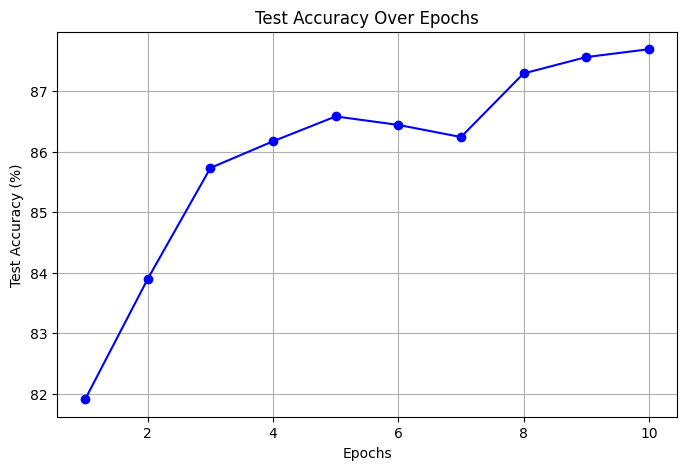

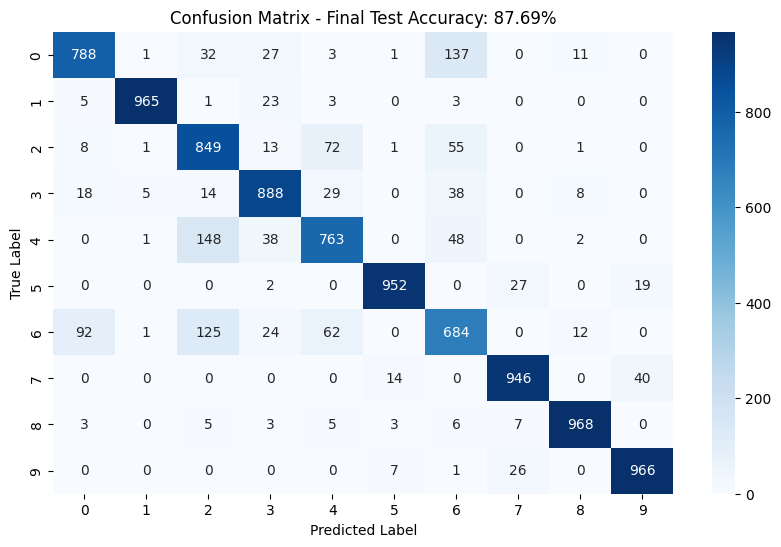

Epoch,▁▂▃▃▄▅▆▆▇█
Test Accuracy,▁▃▆▆▇▆▆███
Train_accuracy,▁▃▅▅▆▆▆▇██
Train_loss,█▆▄▃▃▂▃▂▁▁
Val_accuracy,▁▄▅▆▆▇▇███
Val_loss,█▅▃▃▂▂▃▁▁▁
epoch,▁▁▁▁▁▁▁▁▁▁
Epoch,10
Test Accuracy,87.69
Train_accuracy,90.90926
Train_loss,0.45268


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import wandb

def train_best_model_and_plot_confusion_matrix():
    wandb.init(project="DA6401_Assignment1_ma23m011", name="Best Model - Conf Matrix")

    # Train Best Model
    best_model = NeuralNetwork(
        input_size=784,
        hidden_layers=best_config['hidden_layers'],
        output_size=10,
        learning_rate=best_config['learning_rate'],
        optimizer=best_config['optimizer'],
        weight_init=best_config['weight_init'],
        activation=best_config['activation'],
        weight_decay=best_config['weight_decay']
    )

    num_epochs = best_config['epochs']
    batch_size = best_config['batch_size']

    # Store test accuracy for plotting
    test_accuracies = []

    for epoch in range(num_epochs):
        best_model.train(x_train, y_train, x_val, y_val, epochs=1, batch_size=batch_size)

        # Forward pass to get predictions on test set
        y_pred_probs = best_model.forward(x_test)[0][-1]  # Get softmax output
        y_pred = np.argmax(y_pred_probs, axis=1)
        y_true = np.argmax(y_test, axis=1)

        # Compute test accuracy
        accuracy = np.sum(y_pred == y_true) / y_true.shape[0]
        test_accuracies.append(accuracy * 100)  # Convert to percentage

        print(f"Epoch {epoch+1}: Test Accuracy = {accuracy*100:.2f}%")

        # Log accuracy per epoch to WandB
        wandb.log({"Test Accuracy": accuracy * 100, "Epoch": epoch + 1})

    # Plot Test Accuracy Over Epochs
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, num_epochs+1), test_accuracies, marker='o', linestyle='-', color='b')
    plt.xlabel("Epochs")
    plt.ylabel("Test Accuracy (%)")
    plt.title("Test Accuracy Over Epochs")
    plt.grid()

    # Log the accuracy plot
    wandb.log({"Test Accuracy Plot": wandb.Image(plt)})
    plt.show()

    # Compute Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - Final Test Accuracy: {accuracy*100:.2f}%")

    # Log confusion matrix to WandB
    wandb.log({"Confusion Matrix": wandb.Image(fig)})

    plt.show()

# Run the Sweep
wandb.agent(sweep_id_conf_matrix, function=train_best_model_and_plot_confusion_matrix)

In [ ]:
# Define Modified Neural Network
class ModifiedNeuralNetwork(NeuralNetwork):
    def __init__(self, loss_function="cross_entropy", **kwargs):
        super().__init__(**kwargs)
        self.loss_function = loss_function

    def compute_loss(self, y_true, y_pred):
        # Compute loss based on loss function.
        if self.loss_function == "cross_entropy":
            return -np.sum(y_true * np.log(y_pred + self.epsilon)) / y_true.shape[0]
        elif self.loss_function == "squared_error":
            return np.mean((y_true - y_pred) ** 2)

    def train(self, X_train, y_train, X_val, y_val, epochs=10, batch_size=32):
        #Train the neural network using mini-batch gradient descent
        num_samples = X_train.shape[0]
        loss_history = []  # Store loss values per epoch

        for epoch in range(epochs):
            indices = np.arange(num_samples)
            np.random.shuffle(indices)
            X_train, y_train = X_train[indices], y_train[indices]

            for i in range(0, num_samples, batch_size):
                X_batch = X_train[i:i + batch_size]
                y_batch = y_train[i:i + batch_size]

                #Use forward pass
                activations, z_values = self.forward(X_batch)

                # Compute gradients
                gradients_w, gradients_b = self.backward(X_batch, y_batch, activations, z_values)

                # Update weights
                self.update_weights(gradients_w, gradients_b)

            # Compute training loss
            train_activations, _ = self.forward(X_train)
            train_loss = self.compute_loss(y_train, train_activations[-1])
            loss_history.append(train_loss)

            print(f"Epoch {epoch+1}: Loss = {train_loss:.4f}")

            # Log loss per epoch in WandB
            wandb.log({f"{self.loss_function} Loss": train_loss, "Epoch": epoch})

        return loss_history  # Return loss values for plotting


Epoch 1: Loss = 0.1754
Epoch 2: Loss = 0.1048
Epoch 3: Loss = 0.0798
Epoch 4: Loss = 0.0714
Epoch 5: Loss = 0.0635
Epoch 6: Loss = 0.0343
Epoch 7: Loss = 0.0305
Epoch 8: Loss = 0.0219
Epoch 9: Loss = 0.0196
Epoch 10: Loss = 0.0220
Epoch 1: Loss = 0.0082
Epoch 2: Loss = 0.0056
Epoch 3: Loss = 0.0038
Epoch 4: Loss = 0.0031
Epoch 5: Loss = 0.0021
Epoch 6: Loss = 0.0020
Epoch 7: Loss = 0.0022
Epoch 8: Loss = 0.0018
Epoch 9: Loss = 0.0008
Epoch 10: Loss = 0.0008


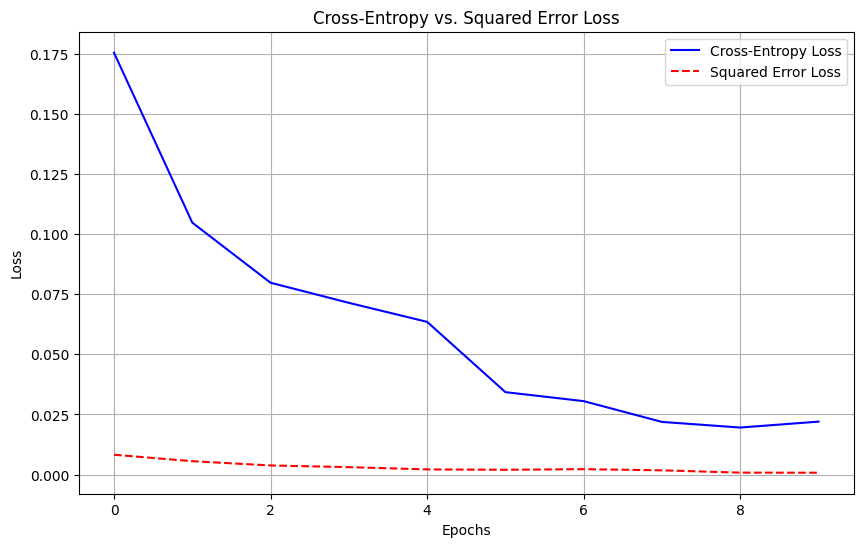

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import wandb

# Initialize WandB
wandb.init(project="DA6401_Assignment1_ma23m011", name="loss_comparison")

# ------------------------------ Define Modified Neural Network ------------------------------
class ModifiedNeuralNetwork(NeuralNetwork):
    def __init__(self, loss_function="cross_entropy", **kwargs):
        """
        Extends NeuralNetwork to support both Cross-Entropy and Squared Error Loss.
        """
        super().__init__(**kwargs)
        self.loss_function = loss_function

    def compute_loss(self, y_true, y_pred):
        """ Compute loss based on selected loss function. """
        if self.loss_function == "cross_entropy":
            return -np.sum(y_true * np.log(y_pred + self.epsilon)) / y_true.shape[0]
        elif self.loss_function == "squared_error":
            return np.mean((y_true - y_pred) ** 2)

    def train(self, X_train, y_train, X_val, y_val, epochs=10, batch_size=32):
        """ Train the network using mini-batch gradient descent and track loss per epoch. """
        num_samples = X_train.shape[0]
        loss_history = []  # Store loss values per epoch

        for epoch in range(epochs):
            indices = np.arange(num_samples)
            np.random.shuffle(indices)
            X_train, y_train = X_train[indices], y_train[indices]

            for i in range(0, num_samples, batch_size):
                X_batch = X_train[i:i + batch_size]
                y_batch = y_train[i:i + batch_size]

                # Forward pass
                activations, z_values = self.forward(X_batch)

                # Compute gradients
                gradients_w, gradients_b = self.backward(X_batch, y_batch, activations, z_values)

                # Update weights
                self.update_weights(gradients_w, gradients_b)

            # Compute training loss
            train_activations, _ = self.forward(X_train)
            train_loss = self.compute_loss(y_train, train_activations[-1])
            loss_history.append(train_loss)

            print(f"Epoch {epoch+1}: Loss = {train_loss:.4f}")

            # Log loss per epoch in WandB
            wandb.log({f"{self.loss_function} Loss": train_loss, "Epoch": epoch})

        return loss_history  # Return loss values for plotting

#Train with Cross-Entropy Loss
cross_entropy_model = ModifiedNeuralNetwork(
    input_size=784, hidden_layers=[128]*5, output_size=10,
    learning_rate=0.001, optimizer="sgd", weight_init="xavier",
    activation="relu", weight_decay=0.0005, loss_function="cross_entropy"
)

cross_entropy_losses = cross_entropy_model.train(x_train, y_train, x_val, y_val, epochs=10, batch_size=64)

# Train with Squared Error Loss
squared_error_model = ModifiedNeuralNetwork(
    input_size=784, hidden_layers=[128]*5, output_size=10,
    learning_rate=0.001, optimizer="sgd", weight_init="xavier",
    activation="relu", weight_decay=0.0005, loss_function="squared_error"
)

squared_error_losses = squared_error_model.train(x_train, y_train, x_val, y_val, epochs=10, batch_size=64)

# Plot the Loss Curves
plt.figure(figsize=(10, 6))
plt.plot(cross_entropy_losses, label="Cross-Entropy Loss", color="blue")
plt.plot(squared_error_losses, label="Squared Error Loss", color="red", linestyle="dashed")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Cross-Entropy vs. Squared Error Loss")
plt.legend()
plt.grid()

# Log the loss plot to WandB
wandb.log({"Loss Comparison Plot": wandb.Image(plt)})
plt.show()

In [12]:
import wandb
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and flatten the data
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

# Convert labels to one-hot encoding
def one_hot_encode(y, num_classes=10):
    one_hot = np.zeros((y.size, num_classes))
    one_hot[np.arange(y.size), y] = 1
    return one_hot

y_train = one_hot_encode(y_train)
y_test = one_hot_encode(y_test)

#Train and Evaluate Function
def train_and_evaluate(config, name):
    wandb.init(project="DA6401_Assignment1_ma23m011", name=name, reinit=True)

    # Train the model with given config
    model = ModifiedNeuralNetwork(
        input_size=784, hidden_layers=config['hidden_layers'],
        output_size=10, learning_rate=config['learning_rate'],
        optimizer=config['optimizer'], weight_init=config['weight_init'],
        activation=config['activation'], weight_decay=config['weight_decay']
    )

    num_epochs = 10
    loss_values = []  # store loss per epoch
    test_accuracies = []  # store test accuracy per epoch

    for epoch in range(num_epochs):
        train_loss = model.train(x_train, y_train, x_test, y_test, epochs=1, batch_size=config['batch_size'])
        loss_values.append(train_loss[-1])  # Store last loss of the epoch

        # Compute test accuracy
        y_pred_probs = model.forward(x_test)[0][-1]
        y_pred = np.argmax(y_pred_probs, axis=1)
        y_true = np.argmax(y_test, axis=1)
        accuracy = np.sum(y_pred == y_true) / y_true.shape[0]
        test_accuracies.append(accuracy * 100)

        # Log to WandB
        wandb.log({"Epoch": epoch + 1, "Test Accuracy": accuracy * 100, f"{name} Loss": train_loss[-1]})

    # Plot Loss Curve
    plt.figure(figsize=(6, 4))
    plt.plot(range(1, num_epochs + 1), loss_values, marker='o', linestyle='-', color='b')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"{name} Loss Over Epochs")
    plt.grid()
    wandb.log({f"{name} Loss Plot": wandb.Image(plt)})
    plt.close()

    # Plot Test Accuracy Curve
    plt.figure(figsize=(6, 4))
    plt.plot(range(1, num_epochs + 1), test_accuracies, marker='o', linestyle='-', color='g')
    plt.xlabel("Epochs")
    plt.ylabel("Test Accuracy (%)")
    plt.title(f"{name} Test Accuracy Over Epochs")
    plt.grid()
    wandb.log({f"{name} Accuracy Plot": wandb.Image(plt)})
    plt.close()

    print(f"{name} - Final Test Accuracy: {test_accuracies[-1]:.2f}%")
    return test_accuracies[-1]

# Run 3 Best Configurations based on fshoin mnist accuracy
configs = [
    {"hidden_layers": [128]*5, "activation": "relu", "optimizer": "sgd", "learning_rate": 0.001, "batch_size": 64, "weight_decay": 0.0005, "weight_init": "xavier"},
    {"hidden_layers": [64]*3, "activation": "sigmoid", "optimizer": "adam", "learning_rate": 0.001, "batch_size": 64, "weight_decay": 0.0005, "weight_init": "xavier"},
    {"hidden_layers": [128]*5, "activation": "tanh", "optimizer": "rmsprop", "learning_rate": 0.001, "batch_size":64, "weight_decay": 0.0005, "weight_init": "xavier"}
]

results = []
for i, config in enumerate(configs):
    accuracy = train_and_evaluate(config, f"Config {i+1} Final")
    results.append((f"Config {i+1}", accuracy))

# Print Final Results
print("\nFinal Results on MNIST:")
for config_name, acc in results:
    print(f"{config_name}: {acc:.2f}%")

Epoch,▁▂▃▃▄▅▆▆▇█▁▂▃▃▄▅▆▆▇█
cross_entropy Loss,█▅▄▃▃▂▁▁▁▁
squared_error Loss,█▅▄▃▂▂▂▂▁▁
Epoch,9
cross_entropy Loss,0.02201
squared_error Loss,0.00076


Epoch 1: Loss = 0.1802
Epoch 1: Loss = 0.1182
Epoch 1: Loss = 0.0936
Epoch 1: Loss = 0.0552
Epoch 1: Loss = 0.0535
Epoch 1: Loss = 0.0418
Epoch 1: Loss = 0.0306
Epoch 1: Loss = 0.0215
Epoch 1: Loss = 0.0239
Epoch 1: Loss = 0.0394
Config 1 Final - Final Test Accuracy: 96.91%


Config 1 Final Loss,█▅▄▂▂▂▁▁▁▂
Epoch,▁▂▁▂▁▃▁▄▁▅▁▅▁▆▁▇▁▇▁█
Test Accuracy,▁▄▄▇▇▇██▇▆
cross_entropy Loss,█▅▄▂▂▂▁▁▁▂
Config 1 Final Loss,0.03941
Epoch,10
Test Accuracy,96.91
cross_entropy Loss,0.03941


Epoch 1: Loss = 0.3249
Epoch 1: Loss = 0.2038
Epoch 1: Loss = 0.1506
Epoch 1: Loss = 0.1225
Epoch 1: Loss = 0.1007
Epoch 1: Loss = 0.0851
Epoch 1: Loss = 0.0711
Epoch 1: Loss = 0.0653
Epoch 1: Loss = 0.0559
Epoch 1: Loss = 0.0479
Config 2 Final - Final Test Accuracy: 96.85%


Config 2 Final Loss,█▅▄▃▂▂▂▁▁▁
Epoch,▁▂▁▂▁▃▁▄▁▅▁▅▁▆▁▇▁▇▁█
Test Accuracy,▁▄▆▇▇▇████
cross_entropy Loss,█▅▄▃▂▂▂▁▁▁
Config 2 Final Loss,0.0479
Epoch,10
Test Accuracy,96.85
cross_entropy Loss,0.0479


Epoch 1: Loss = 0.1556
Epoch 1: Loss = 0.0942
Epoch 1: Loss = 0.0888
Epoch 1: Loss = 0.0533
Epoch 1: Loss = 0.0441
Epoch 1: Loss = 0.0433
Epoch 1: Loss = 0.0335
Epoch 1: Loss = 0.0219
Epoch 1: Loss = 0.0270
Epoch 1: Loss = 0.0182
Config 3 Final - Final Test Accuracy: 97.44%

Final Results on MNIST:
Config 1: 96.91%
Config 2: 96.85%
Config 3: 97.44%
